# Libraries

In [350]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dates
import datetime
 
#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import and read data

In [351]:
churn_data=pd.read_csv('ml_case_training_output.csv')
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [352]:
churn_data['churn'] = churn_data['churn'].replace({0:'stayed',1:'churned'})
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,stayed
1,24011ae4ebbe3035111d65fa7c15bc57,churned
2,d29c2c54acc38ff3c0614d0a653813dd,stayed
3,764c75f661154dac3a6c254cd082ea7d,stayed
4,bba03439a292a1e166f80264c16191cb,stayed


In [353]:
history_data=pd.read_csv('ml_case_training_hist_data.csv')
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [354]:
training_data=pd.read_csv('ml_case_training_data.csv')
training_data.tail()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,...,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392


In [355]:
merge=pd.merge(churn_data, training_data, on='id')
merge.tail()

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
16091,18463073fb097fc0ac5d3e040f356987,stayed,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,churned,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,churned,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,stayed,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000
16095,563dde550fd624d7352f3de77c0cdfcd,stayed,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,...,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392


# CHURN DATA

In [356]:
churn_data.count()

id       16096
churn    16096
dtype: int64

In [357]:
churn_count=churn_data['churn'].value_counts()
print(churn_count)

stayed     14501
churned     1595
Name: churn, dtype: int64


It can be seen that, the number of companies that have churned out is 

In [358]:
rate_of_churn = pd.DataFrame(churn_data['churn'].value_counts() / churn_data.shape[0] * 100)
print(rate_of_churn )

             churn
stayed   90.090706
churned   9.909294


It can be seen that, the number of companies that have churned out is 1595 which represent 9.9%, approximately, 10%.

In [359]:
#changing the column names
merge['churn'] = merge['churn'].replace({0:'stayed',1:'churned'})
merge.head()

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,stayed,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,churned,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,stayed,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,stayed,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,stayed,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


# Data visualization of churn

Text(0.5, 1.0, 'stayed vrs churned')

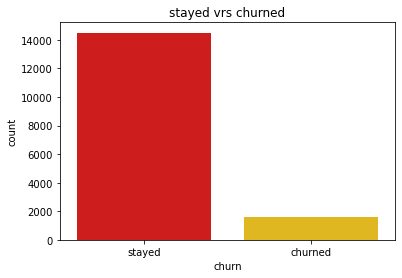

In [360]:
sns.countplot(x= 'churn', data = churn_data, palette = 'hot')
plt.title('stayed vrs churned')

# Describing data

In [361]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   churn                     16096 non-null  object 
 2   activity_new              6551 non-null   object 
 3   campaign_disc_ele         0 non-null      float64
 4   channel_sales             11878 non-null  object 
 5   cons_12m                  16096 non-null  int64  
 6   cons_gas_12m              16096 non-null  int64  
 7   cons_last_month           16096 non-null  int64  
 8   date_activ                16096 non-null  object 
 9   date_end                  16094 non-null  object 
 10  date_first_activ          3508 non-null   object 
 11  date_modif_prod           15939 non-null  object 
 12  date_renewal              16056 non-null  object 
 13  forecast_base_bill_ele    3508 non-null   float64
 14  foreca

It can be seen that the types of date is object, but needs to be in datetime.

In [362]:
merge.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [363]:
merge['has_gas'] = merge['has_gas'].replace({'f':'No','t':'Yes'})
merge.head()

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,stayed,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,...,58.995952,No,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,churned,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,...,40.606701,Yes,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,stayed,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,...,44.311378,No,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,stayed,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,...,44.311378,No,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,stayed,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,...,44.311378,No,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [364]:
history_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [365]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# Checking for missing data

In [366]:
missing_figures_1 = history_data.isnull().sum()
missing_figures_1 = missing_figures_1[missing_figures_1 > 0]
pd.DataFrame({"missing_figures 1": missing_figures_1, "Missing_values_1(%)": history_data.isnull().sum()/len(history_data.index)*100}).sort_values(by = "Missing_values_1(%)", ascending = False)

,missing_figures 1,Missing_values_1(%)
price_p1_fix,1359.0,0.704138
price_p1_var,1359.0,0.704138
price_p2_fix,1359.0,0.704138
price_p2_var,1359.0,0.704138
price_p3_fix,1359.0,0.704138
price_p3_var,1359.0,0.704138
id,NaN,0.000000
price_date,NaN,0.000000


In [367]:
missing_figures = merge.isnull().sum()
missing_figures = missing_figures[missing_figures > 0]
pd.DataFrame({"missing_figures": missing_figures, "Missing values (%)": merge.isnull().sum()/len(merge.index)*100}).sort_values(by = "Missing values (%)", ascending = False)

,missing_figures,Missing values (%)
campaign_disc_ele,16096.0,100.000000
date_first_activ,12588.0,78.205765
forecast_base_bill_ele,12588.0,78.205765
forecast_cons,12588.0,78.205765
forecast_bill_12m,12588.0,78.205765
forecast_base_bill_year,12588.0,78.205765
activity_new,9545.0,59.300447
channel_sales,4218.0,26.205268
date_modif_prod,157.0,0.975398
forecast_price_pow_p1,126.0,0.782803


We need to drop columns with alot of missing data. Hence all columns with more than 70% missing data should be dropped

The history data looks good with less than 1% missing data.

# Visualization of missing figures

<AxesSubplot:>

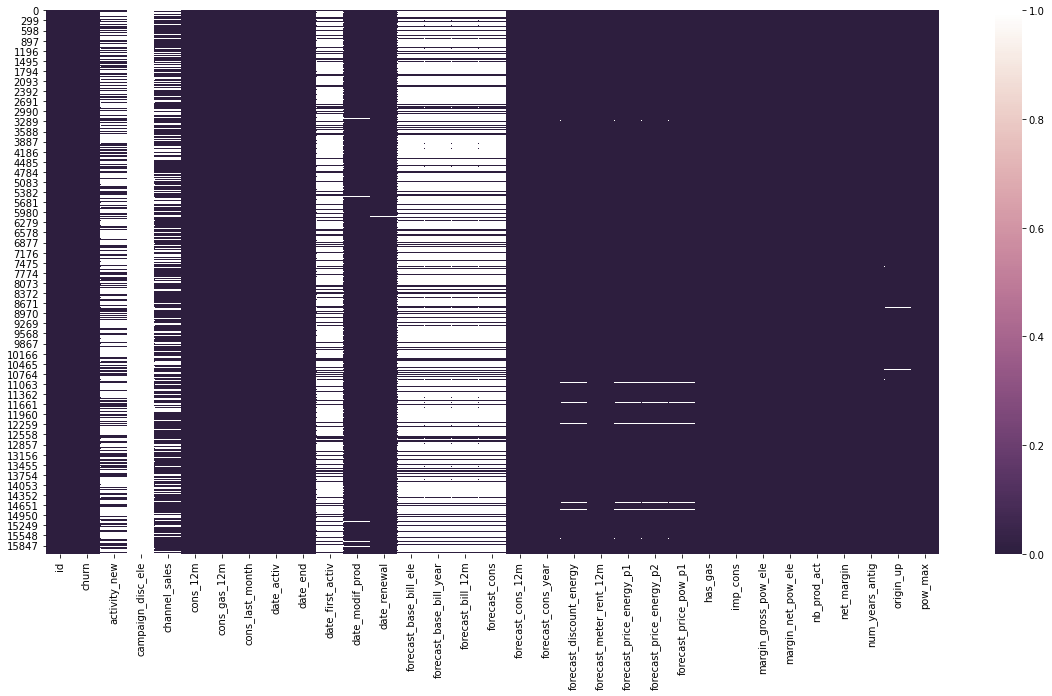

In [368]:
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(merge.isnull(), cmap=cmap)

<AxesSubplot:>

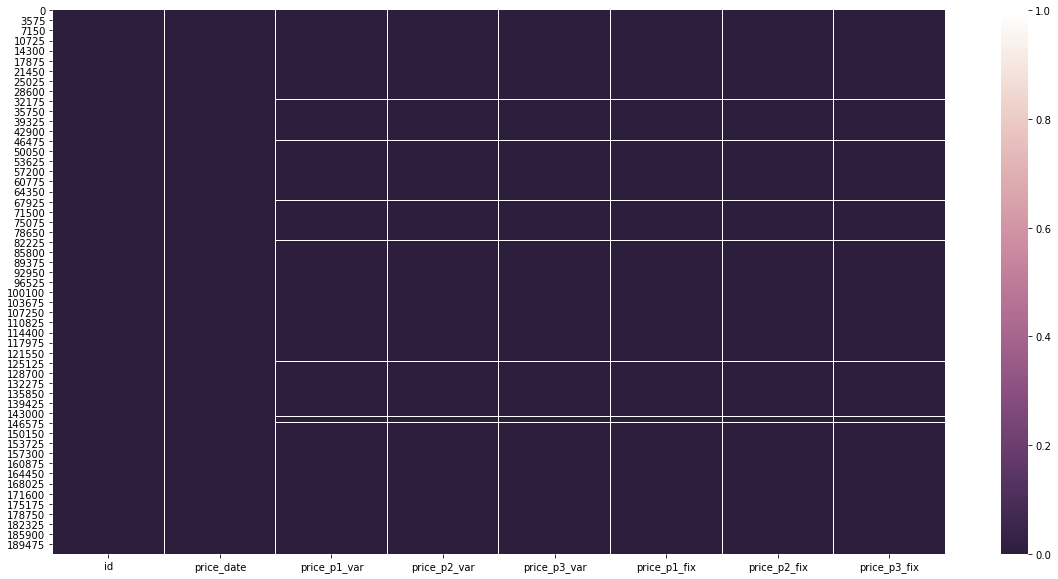

In [369]:
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(history_data.isnull(), cmap=cmap)

In [370]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [371]:
import missingno as msno

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.



<AxesSubplot:>

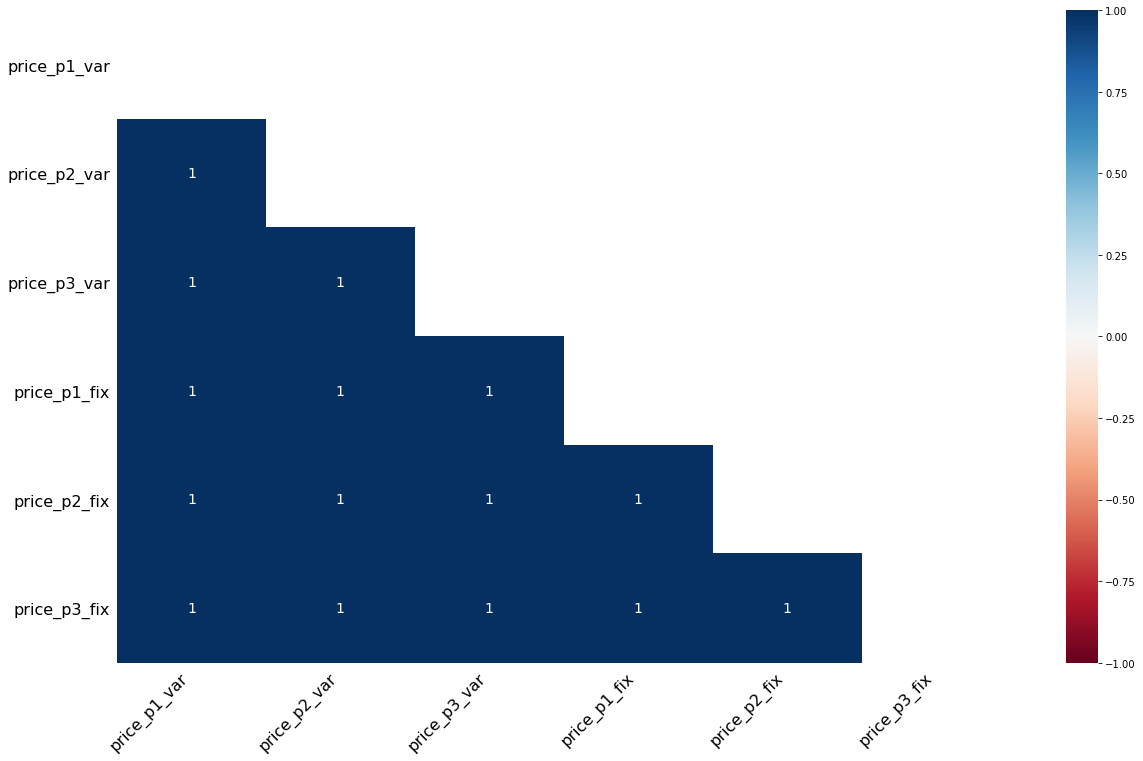

In [372]:
msno.heatmap(history_data)

<AxesSubplot:>

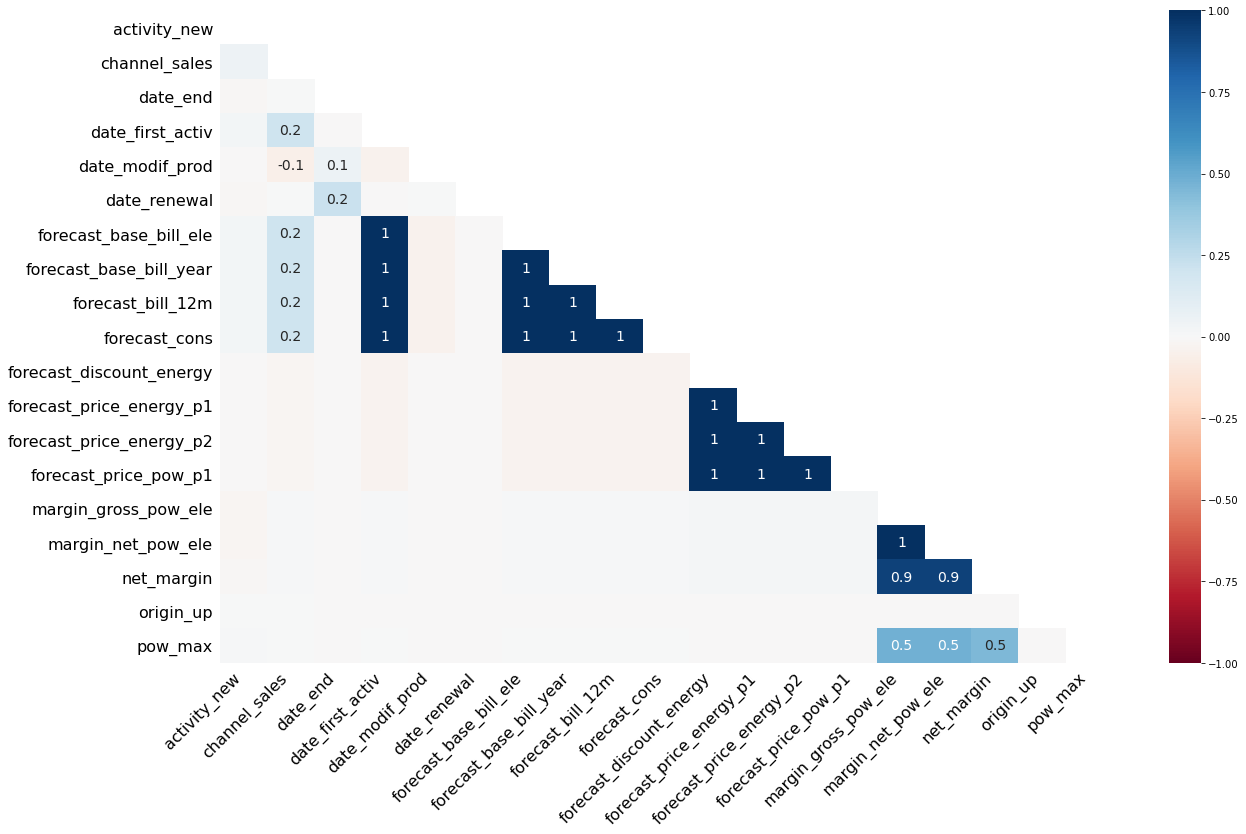

In [373]:
msno.heatmap(merge)

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.
It can be seen that, the columns with alot of missing data is already dropped from the correlation heatmap.

We need to drop columns with alot of missing data. Hence all columns with more than 70% missing data should be dropped

# Dropping missing figures

In [374]:
merge=merge.drop(columns= ["forecast_base_bill_ele", "date_first_activ", "campaign_disc_ele", "forecast_base_bill_year", "forecast_bill_12m", "forecast_cons", ])
merge.head()

,id,churn,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,stayed,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,...,58.995952,No,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,churned,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,Yes,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,stayed,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,...,44.311378,No,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,stayed,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,...,44.311378,No,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,stayed,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,...,44.311378,No,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


## Replacing the Missing data with the mean of the data

To start, we need to find the mean and replace the mean with the null values

In [375]:
#finding the mean of the data
mean_cons_12m= merge["cons_12m"].mean() 
mean_cons_gas_12m= merge["cons_gas_12m"].mean() 
mean_cons_last_month= merge["cons_last_month"].mean() 
mean_forecast_cons_12m= merge["forecast_cons_12m"].mean() 
mean_forecast_cons_year= merge["forecast_cons_year"].mean() 
mean_forecast_discount_energy= merge["forecast_discount_energy"].mean() 
mean_forecast_meter_rent_12m= merge["forecast_meter_rent_12m"].mean() 
mean_forecast_price_energy_p1= merge["forecast_price_energy_p1"].mean() 
mean_forecast_price_energy_p2= merge["forecast_price_energy_p2"].mean() 
mean_forecast_price_pow_p1= merge["forecast_price_pow_p1"].mean() 
mean_imp_cons= merge["imp_cons"].mean() 
mean_margin_gross_pow_ele= merge["margin_gross_pow_ele"].mean() 
mean_margin_net_pow_ele= merge["margin_net_pow_ele"].mean() 
mean_nb_prod_act= merge["nb_prod_act"].mean() 
mean_net_margin= merge["net_margin"].mean() 
mean_num_years_antig= merge["num_years_antig"].mean()
mean_pow_max= merge["pow_max"].mean()

In [376]:
merge["cons_12m"] = merge["cons_12m"].fillna(mean_cons_12m)
merge["cons_gas_12m"] = merge["cons_gas_12m"].fillna(mean_cons_gas_12m)
merge["cons_last_month"] = merge["cons_last_month"].fillna(mean_cons_last_month)
merge["forecast_cons_12m"] = merge["forecast_cons_12m"].fillna(mean_forecast_cons_12m)
merge["forecast_cons_year"] = merge["forecast_cons_year"].fillna(mean_forecast_cons_year)
merge["forecast_discount_energy"] = merge["forecast_discount_energy"].fillna(mean_forecast_discount_energy)
merge["forecast_meter_rent_12m"] = merge["forecast_meter_rent_12m"].fillna(mean_forecast_meter_rent_12m)
merge["forecast_price_energy_p1"] = merge["forecast_price_energy_p1"].fillna(mean_forecast_price_energy_p1)
merge["forecast_price_energy_p2"] = merge["forecast_price_energy_p2"].fillna(mean_forecast_price_energy_p2)
merge["forecast_price_pow_p1"] = merge["forecast_price_pow_p1"].fillna(mean_forecast_price_pow_p1)
merge["imp_cons"] = merge["imp_cons"].fillna(mean_imp_cons)
merge["margin_gross_pow_ele"] = merge["margin_gross_pow_ele"].fillna(mean_margin_gross_pow_ele)
merge["margin_net_pow_ele"] = merge["margin_net_pow_ele"].fillna(mean_margin_net_pow_ele)
merge["nb_prod_act"] = merge["nb_prod_act"].fillna(mean_nb_prod_act)
merge["net_margin"] = merge["net_margin"].fillna(mean_net_margin)
merge["num_years_antig"] = merge["num_years_antig"].fillna(mean_num_years_antig)
merge["pow_max"] = merge["pow_max"].fillna(mean_pow_max)

In [377]:
mean_price_p1_var= history_data["price_p1_var"].mean()
mean_price_p2_var= history_data["price_p2_var"].mean()
mean_price_p3_var= history_data["price_p3_var"].mean()
mean_price_p1_fix= history_data["price_p1_fix"].mean()
mean_price_p2_fix= history_data["price_p2_fix"].mean()
mean_price_p3_fix= history_data["price_p3_fix"].mean()

In [378]:
history_data["price_p1_var"] = history_data["price_p1_var"].fillna(mean_price_p1_var)
history_data["price_p2_var"] = history_data["price_p2_var"].fillna(mean_price_p2_var)
history_data["price_p3_var"] = history_data["price_p3_var"].fillna(mean_price_p3_var)
history_data["price_p1_fix"] = history_data["price_p1_fix"].fillna(mean_price_p1_fix)
history_data["price_p2_fix"] = history_data["price_p2_fix"].fillna(mean_price_p2_fix)
history_data["price_p3_fix"] = history_data["price_p3_fix"].fillna(mean_price_p3_fix)

In [379]:
merge.isnull().sum()

id                             0
churn                          0
activity_new                9545
channel_sales               4218
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       2
date_modif_prod              157
date_renewal                  40
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy       0
forecast_meter_rent_12m        0
forecast_price_energy_p1       0
forecast_price_energy_p2       0
forecast_price_pow_p1          0
has_gas                        0
imp_cons                       0
margin_gross_pow_ele           0
margin_net_pow_ele             0
nb_prod_act                    0
net_margin                     0
num_years_antig                0
origin_up                     87
pow_max                        0
dtype: int64

# Checking Skewness

<AxesSubplot:xlabel='cons_12m'>

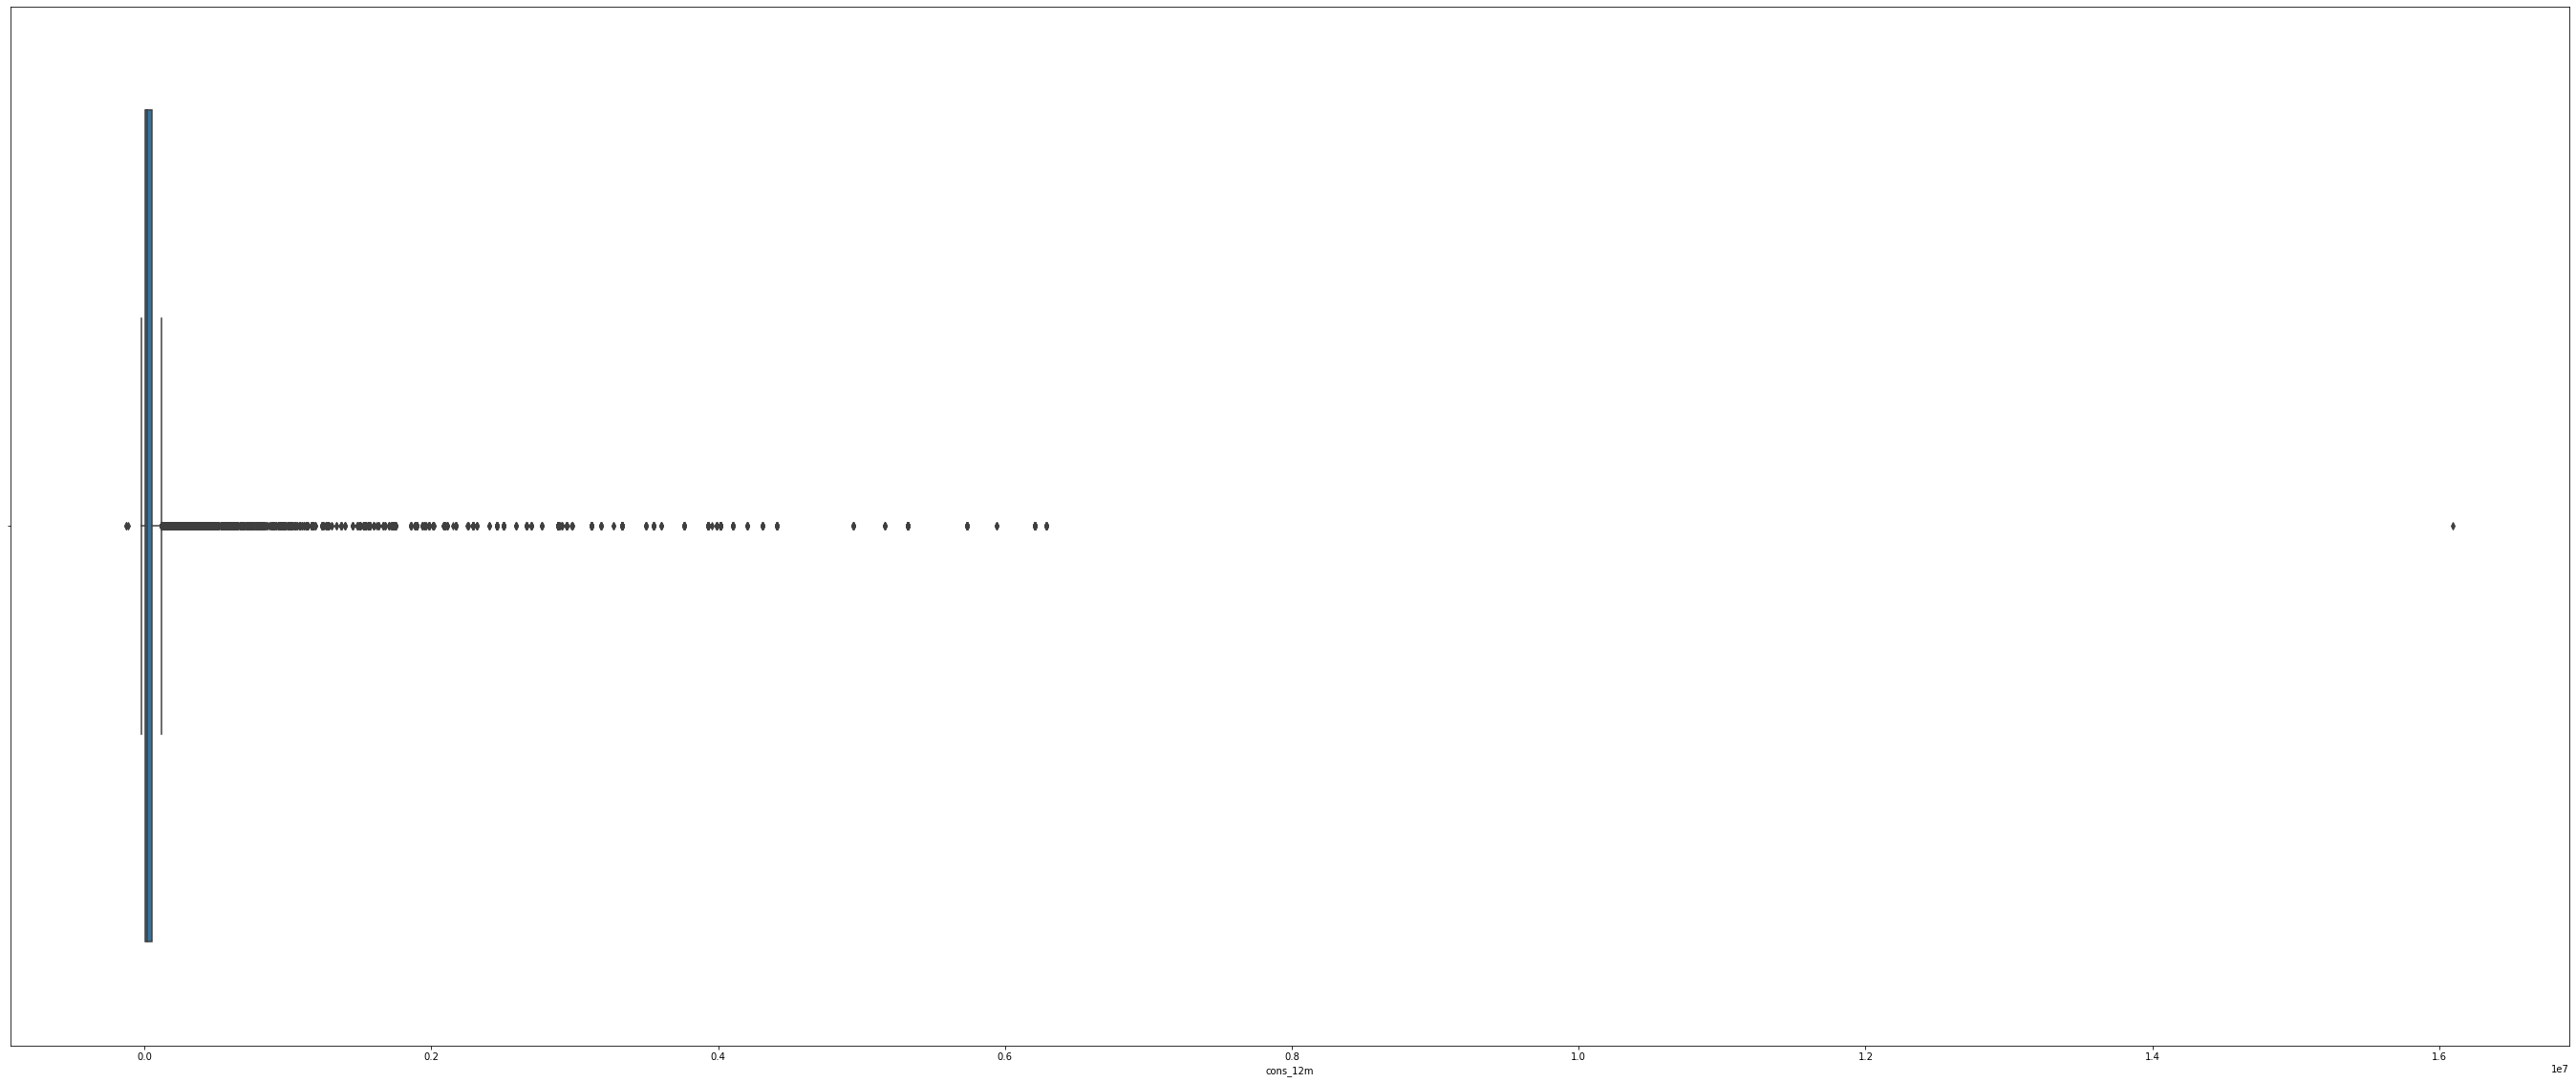

In [380]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['cons_12m'])

<AxesSubplot:xlabel='cons_last_month'>

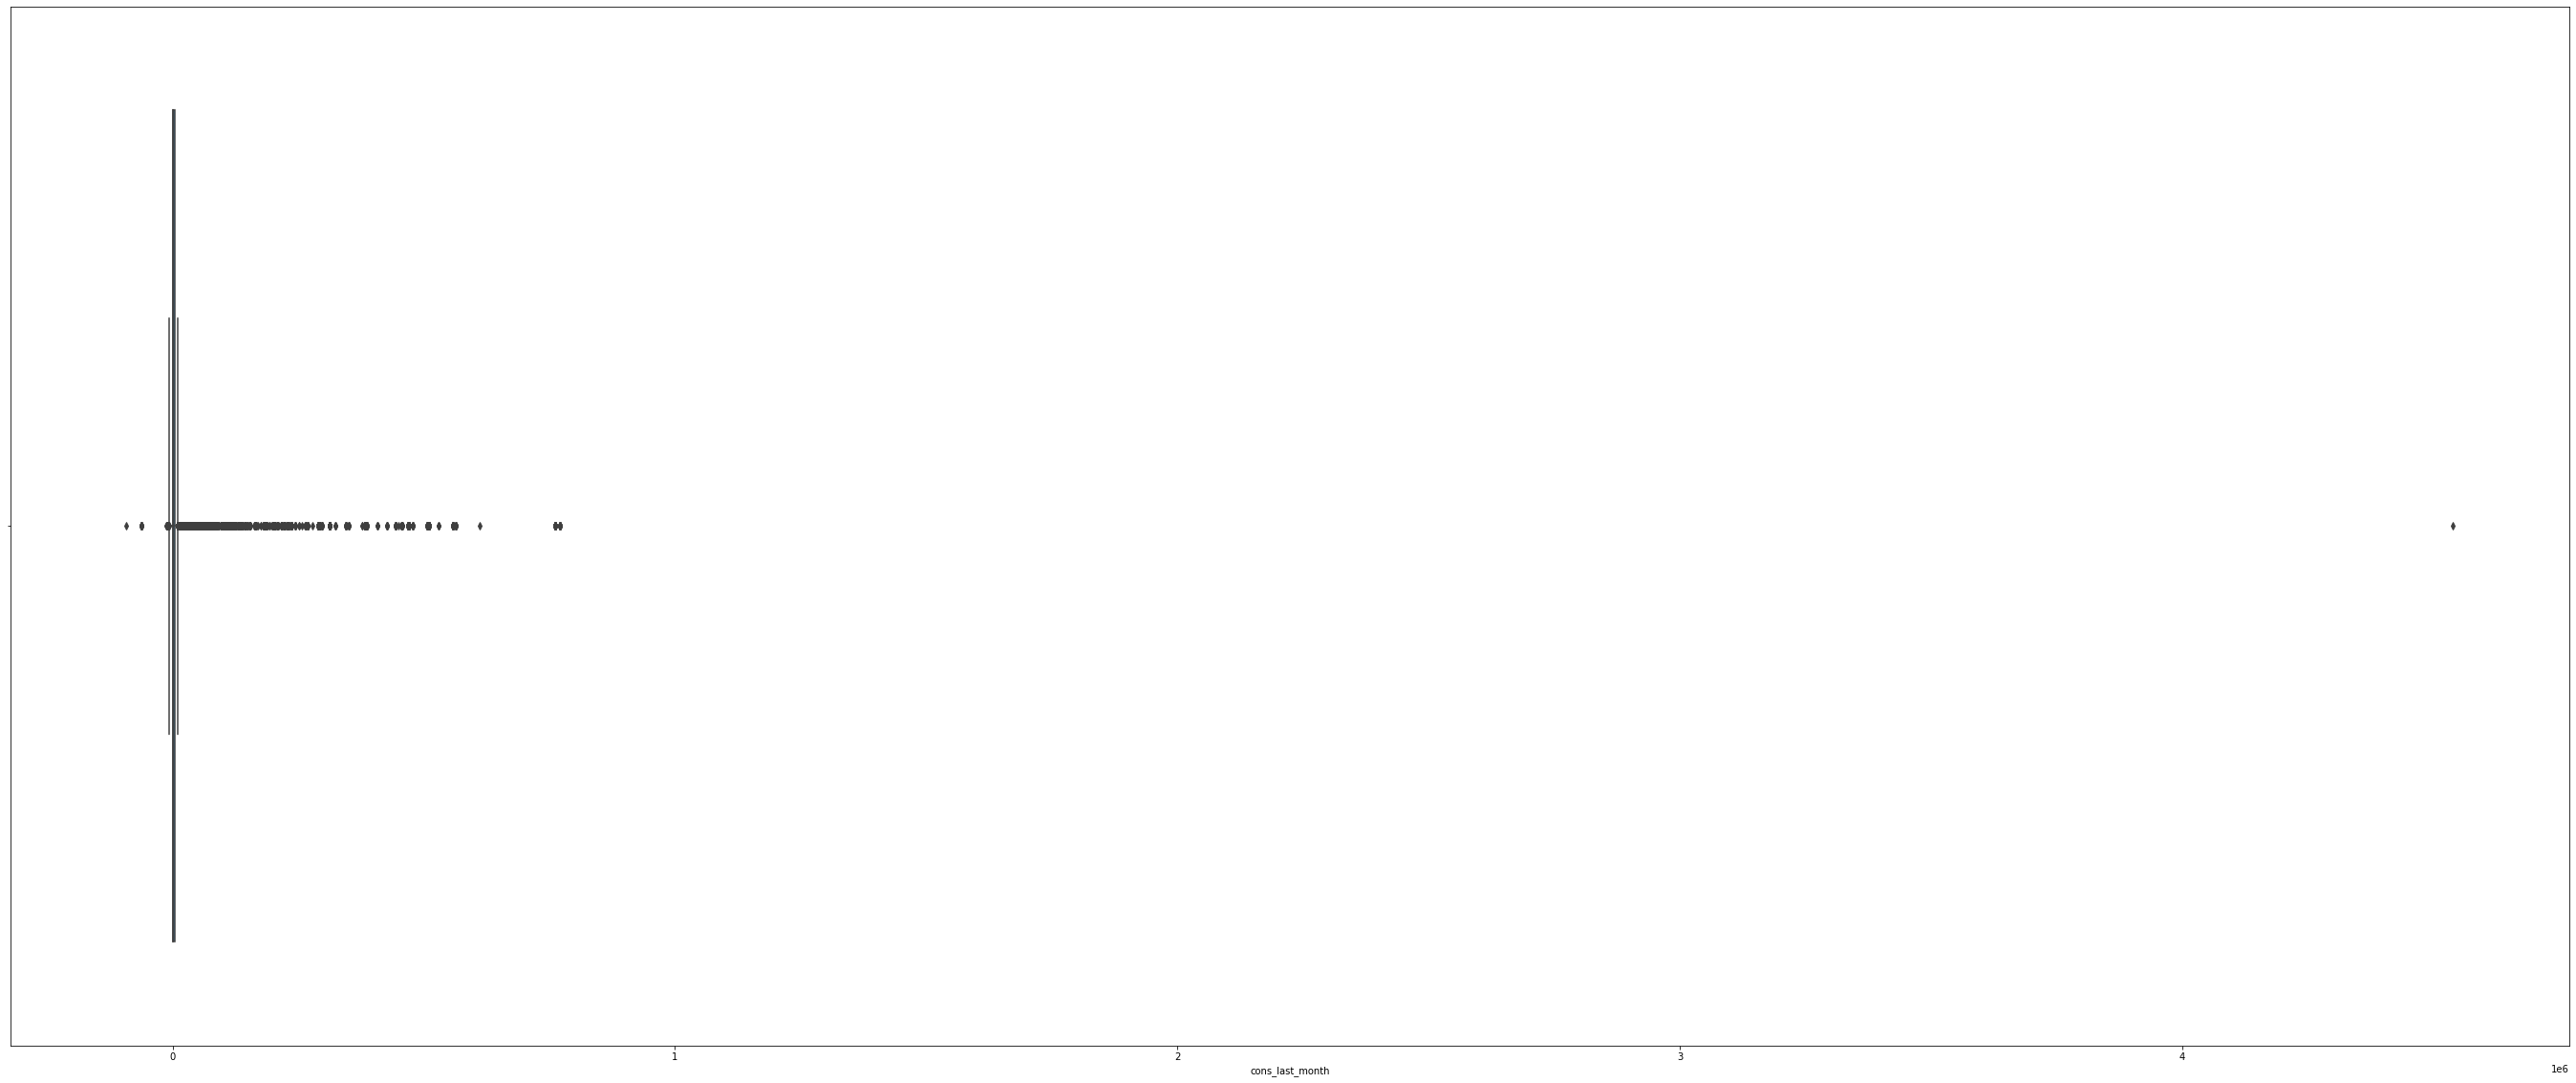

In [381]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['cons_last_month'])

<AxesSubplot:xlabel='cons_last_month'>

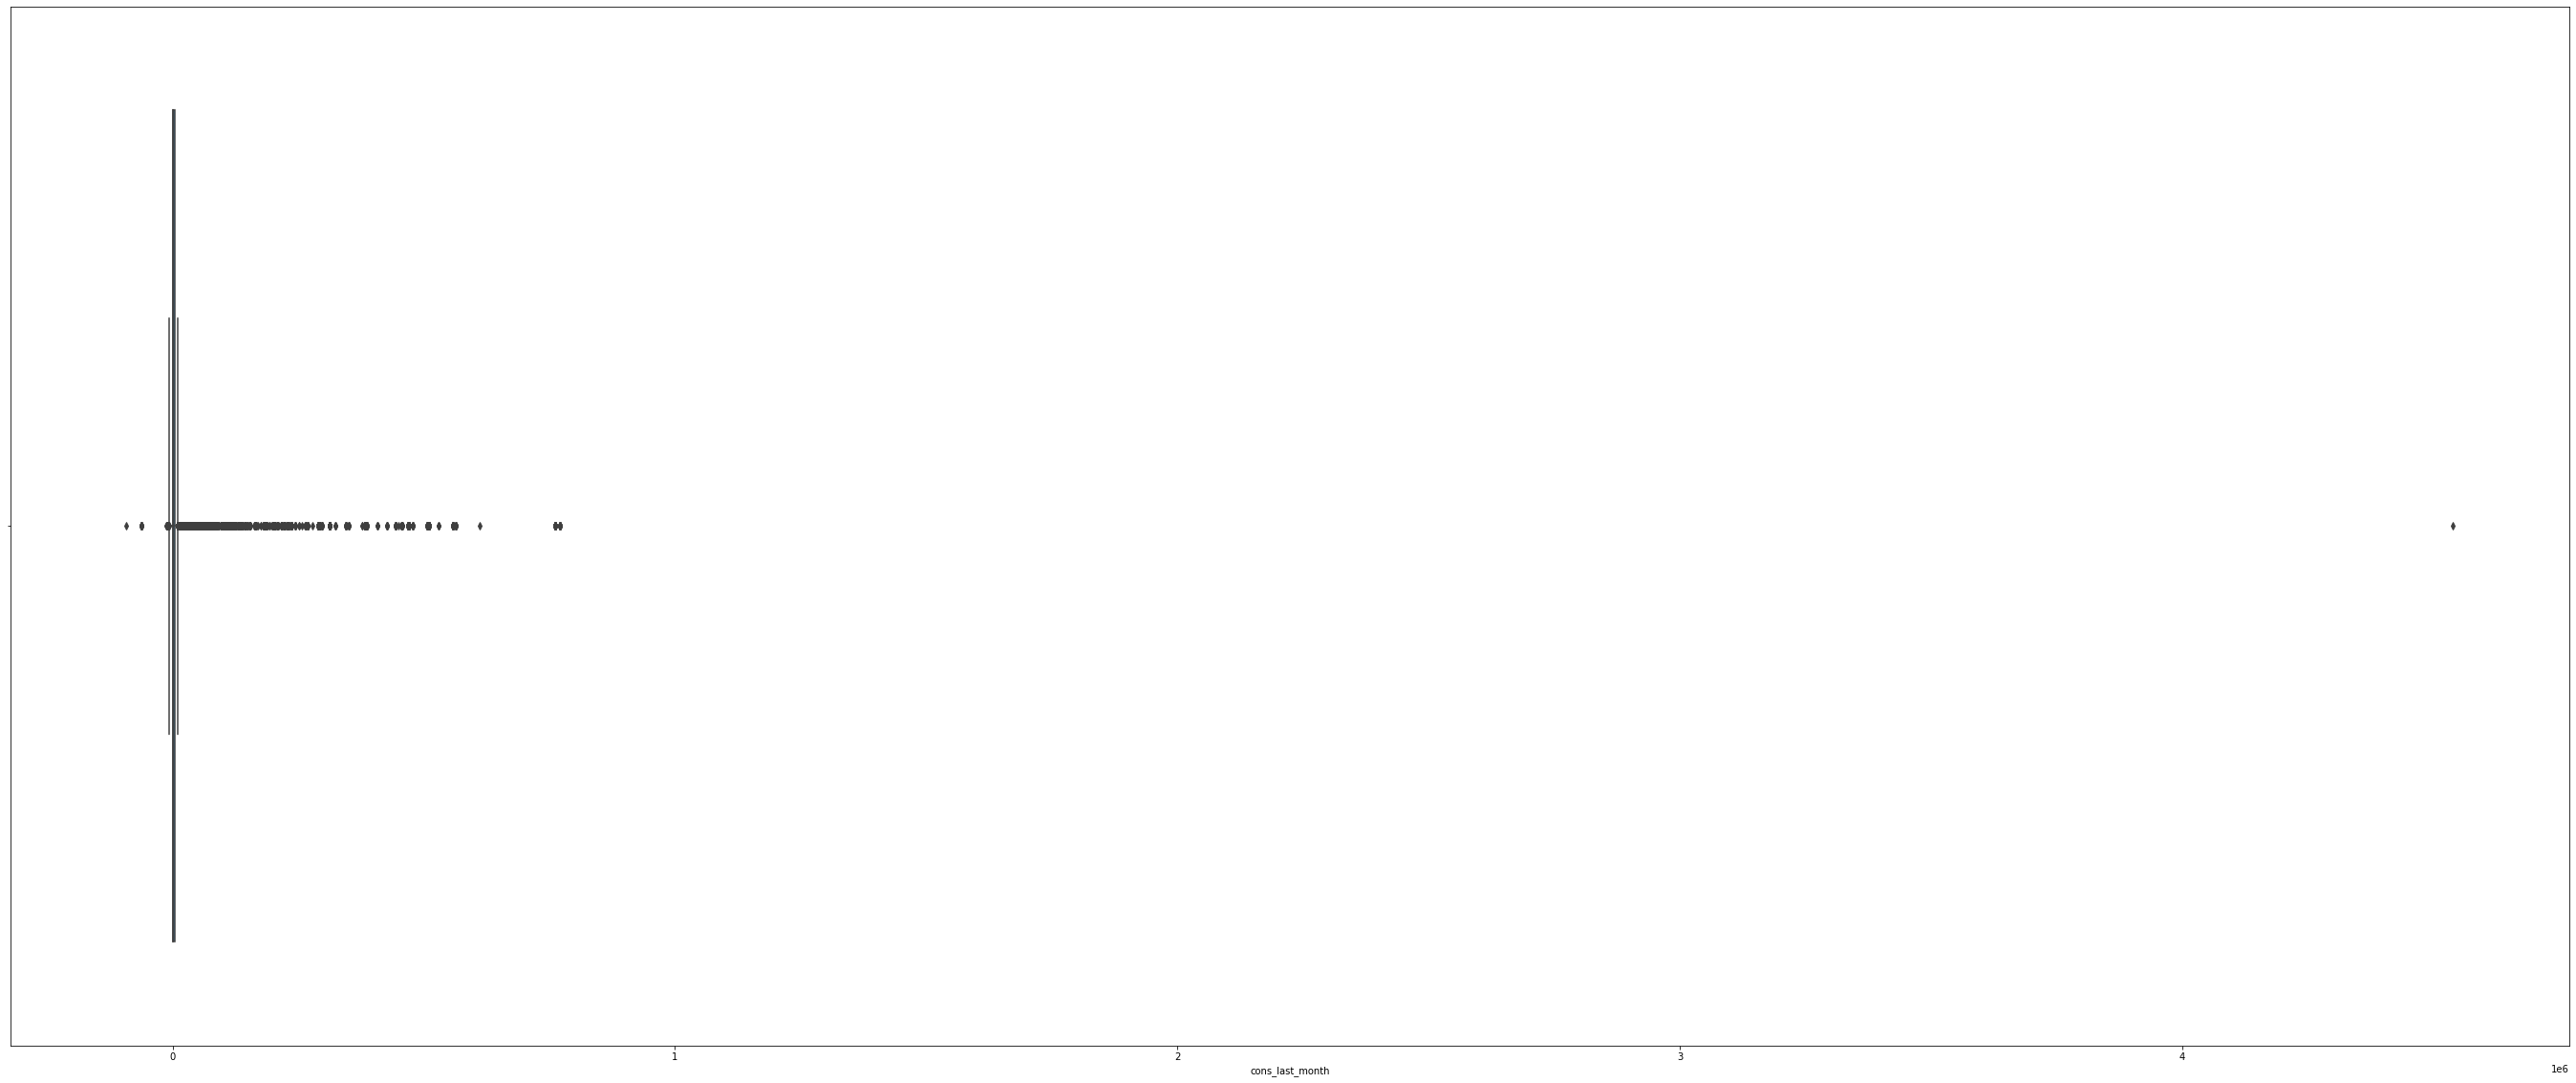

In [382]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['cons_last_month'])

<AxesSubplot:xlabel='forecast_cons_12m'>

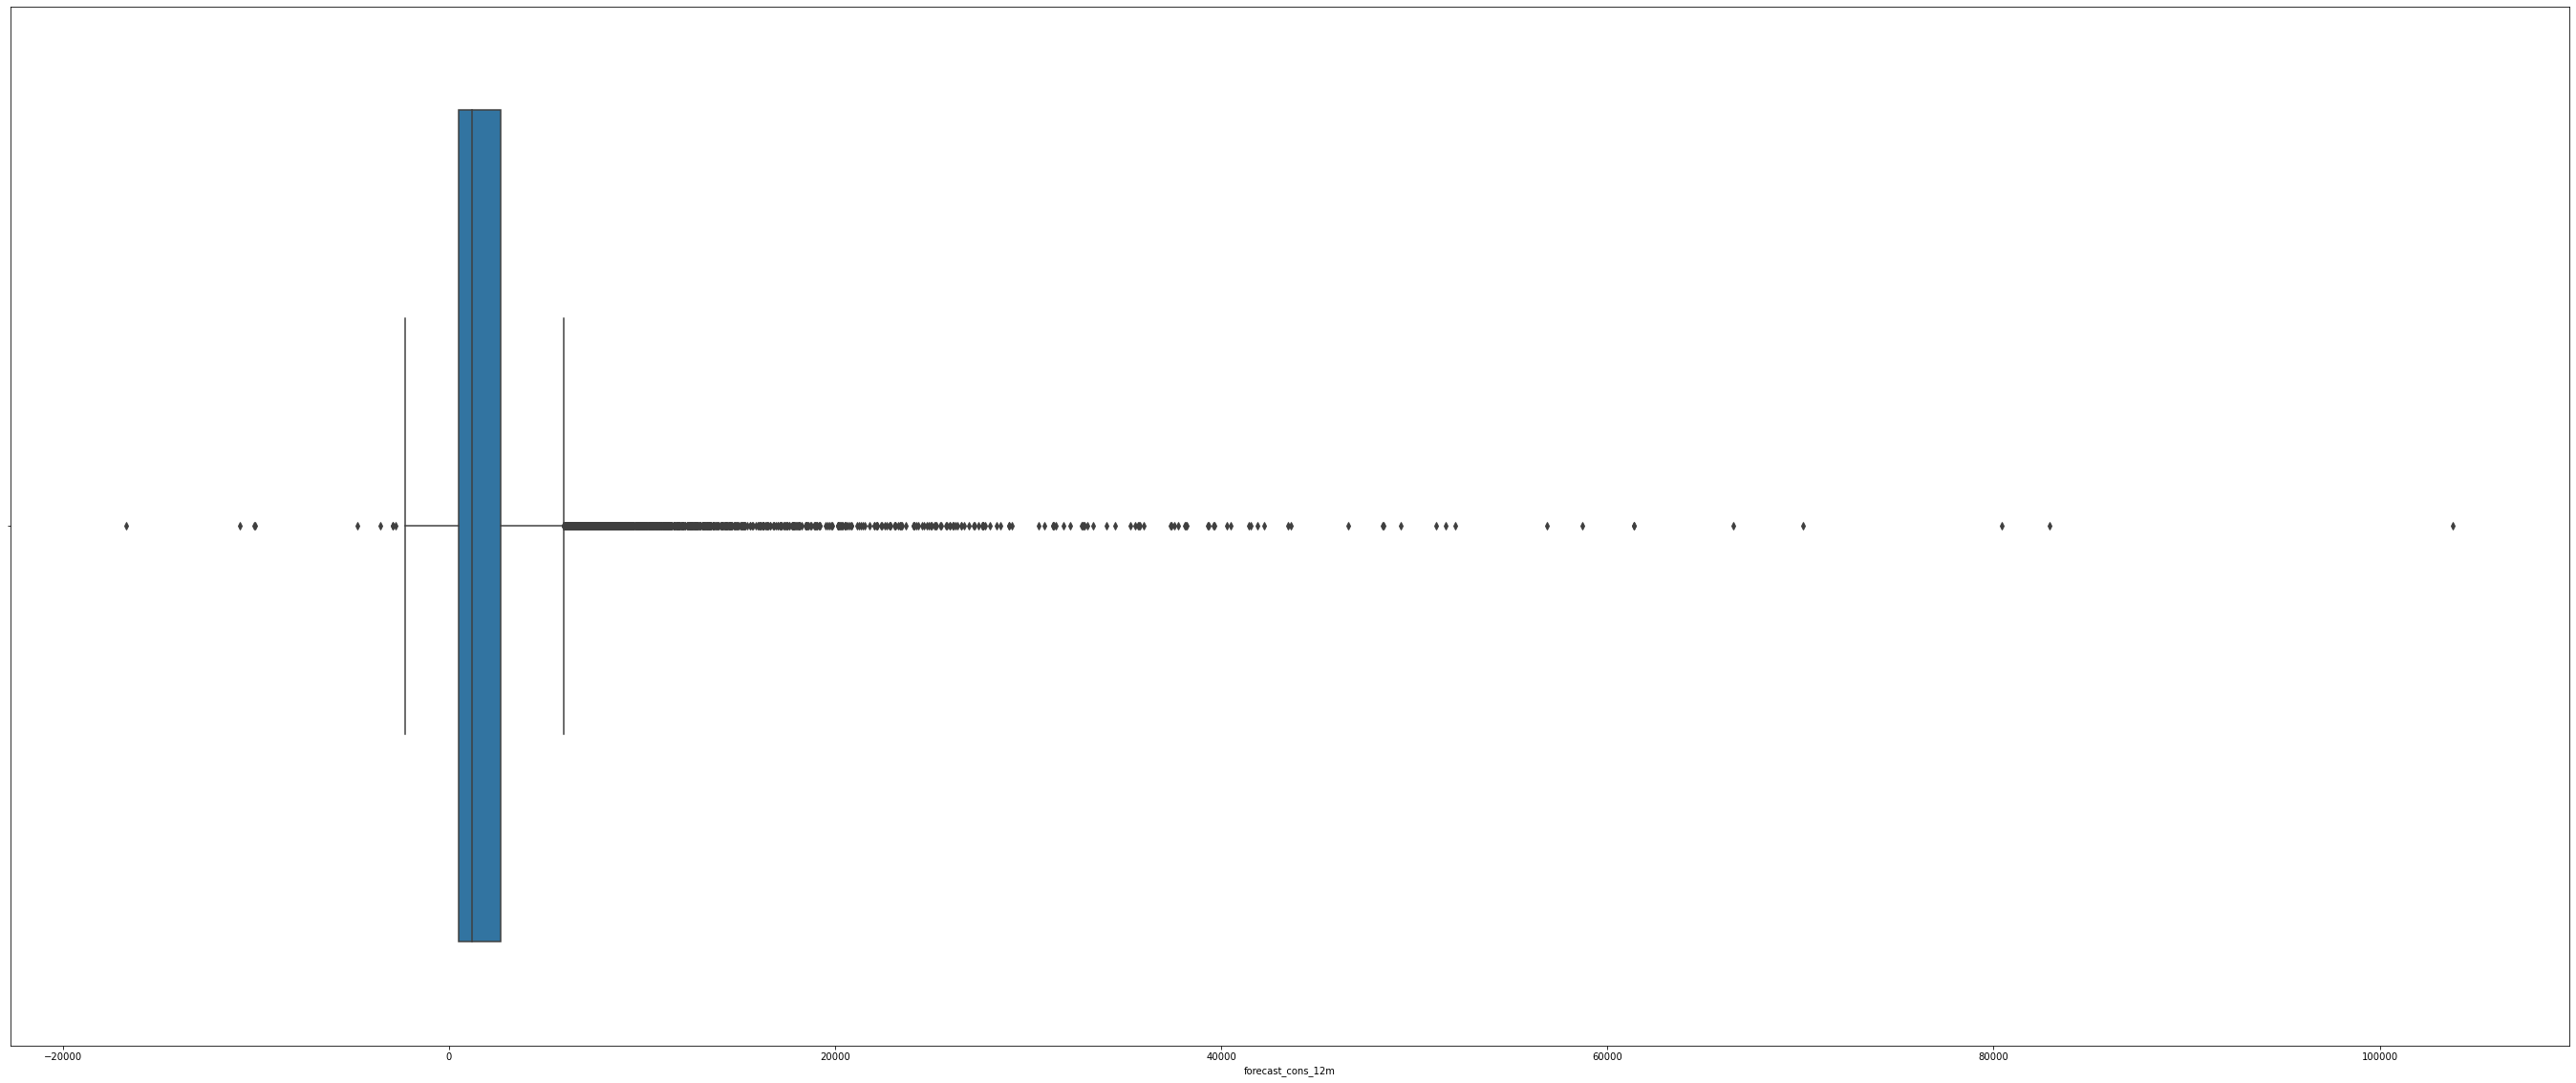

In [383]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['forecast_cons_12m'])

<AxesSubplot:xlabel='forecast_cons_year'>

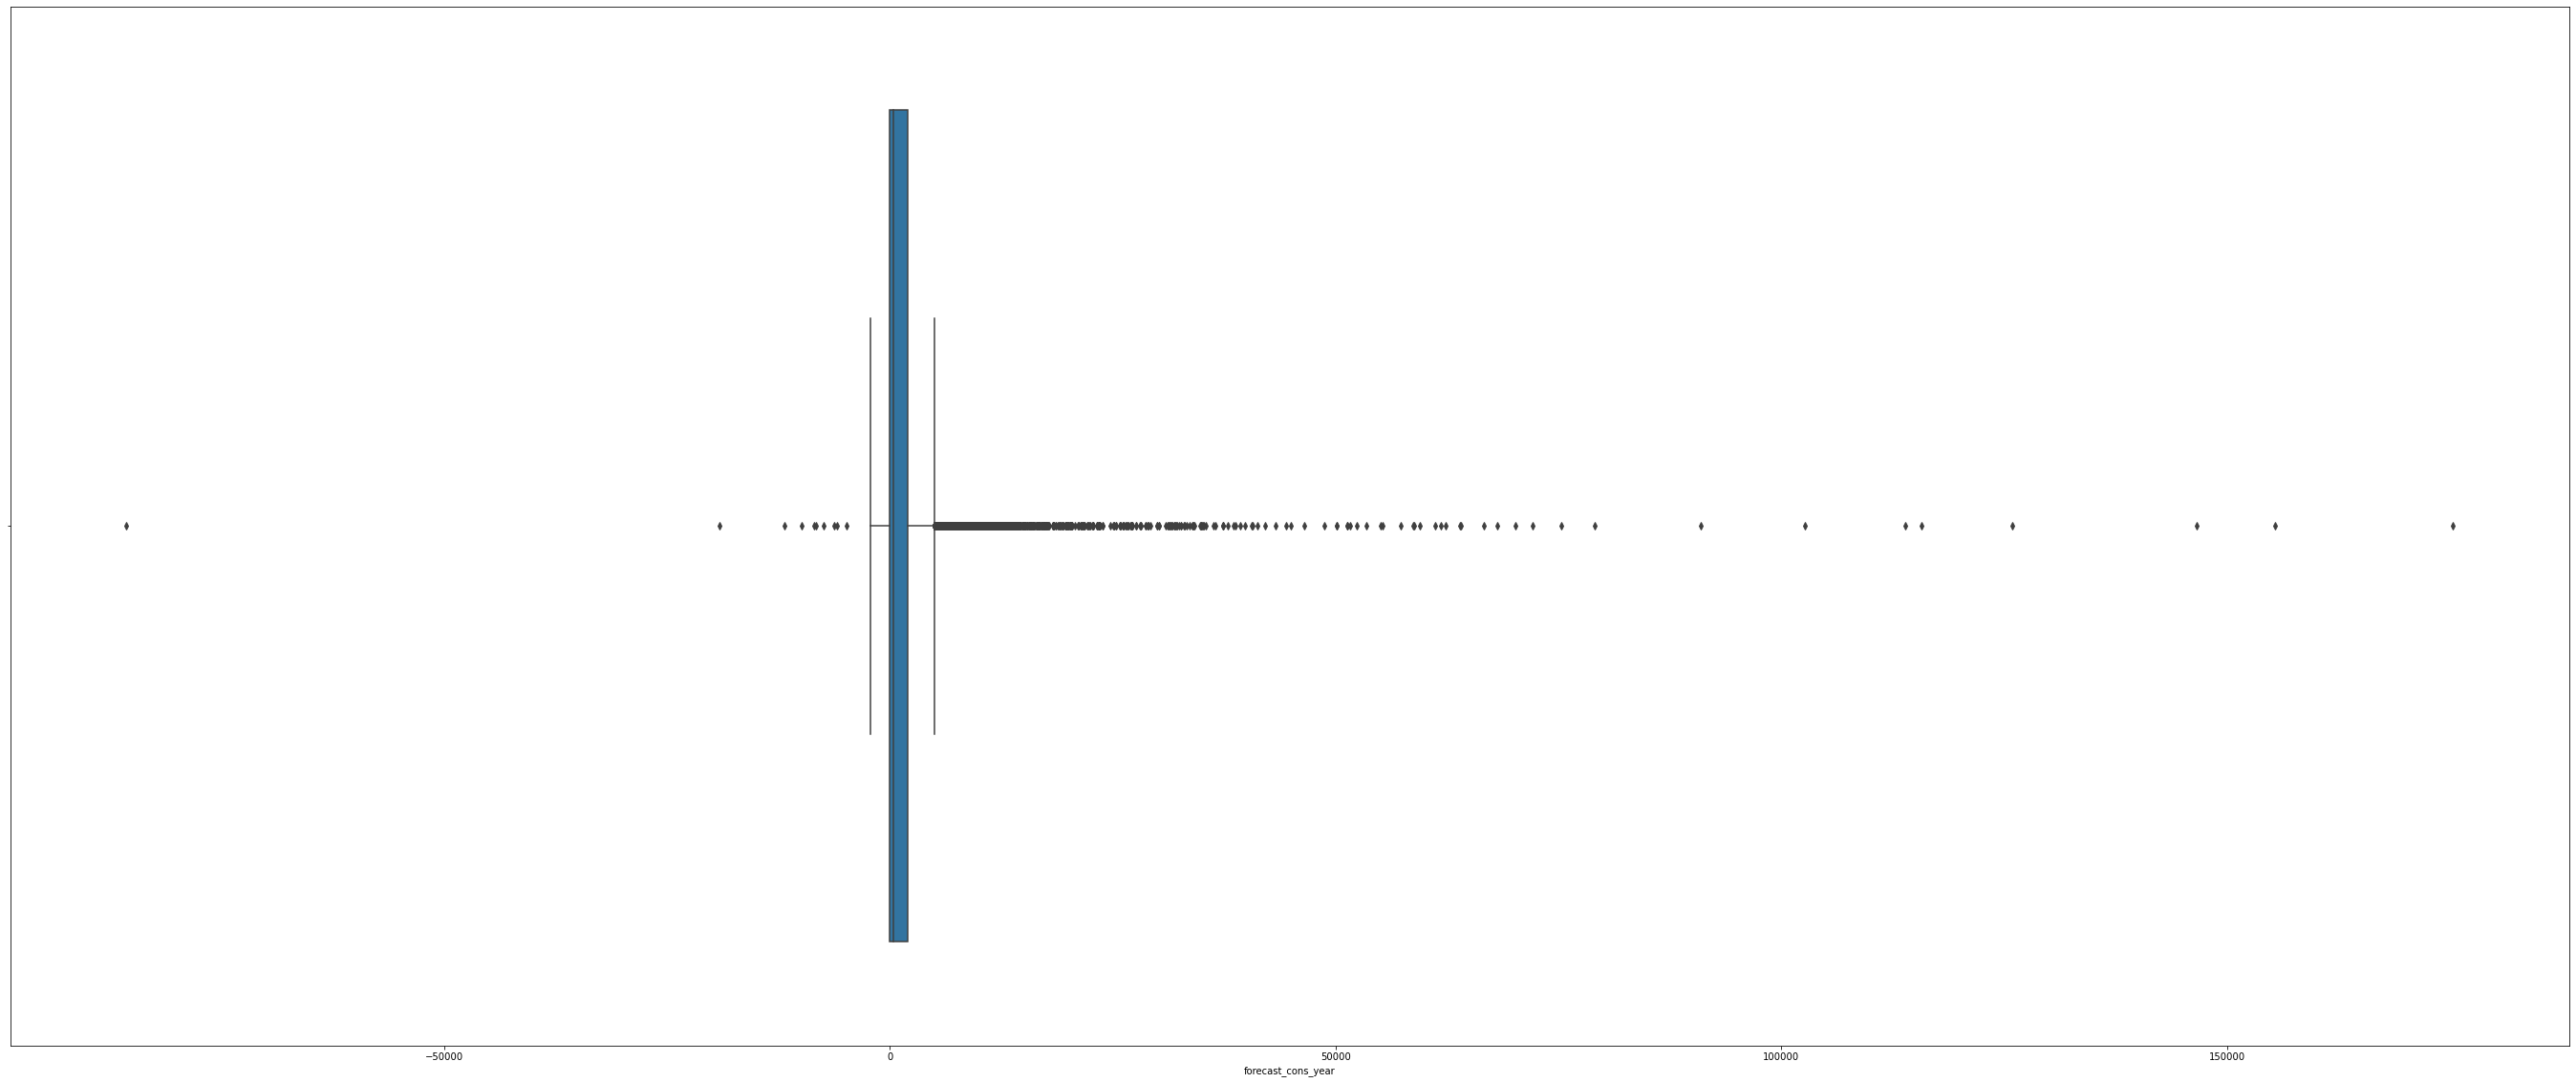

In [384]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['forecast_cons_year'])

<AxesSubplot:xlabel='imp_cons'>

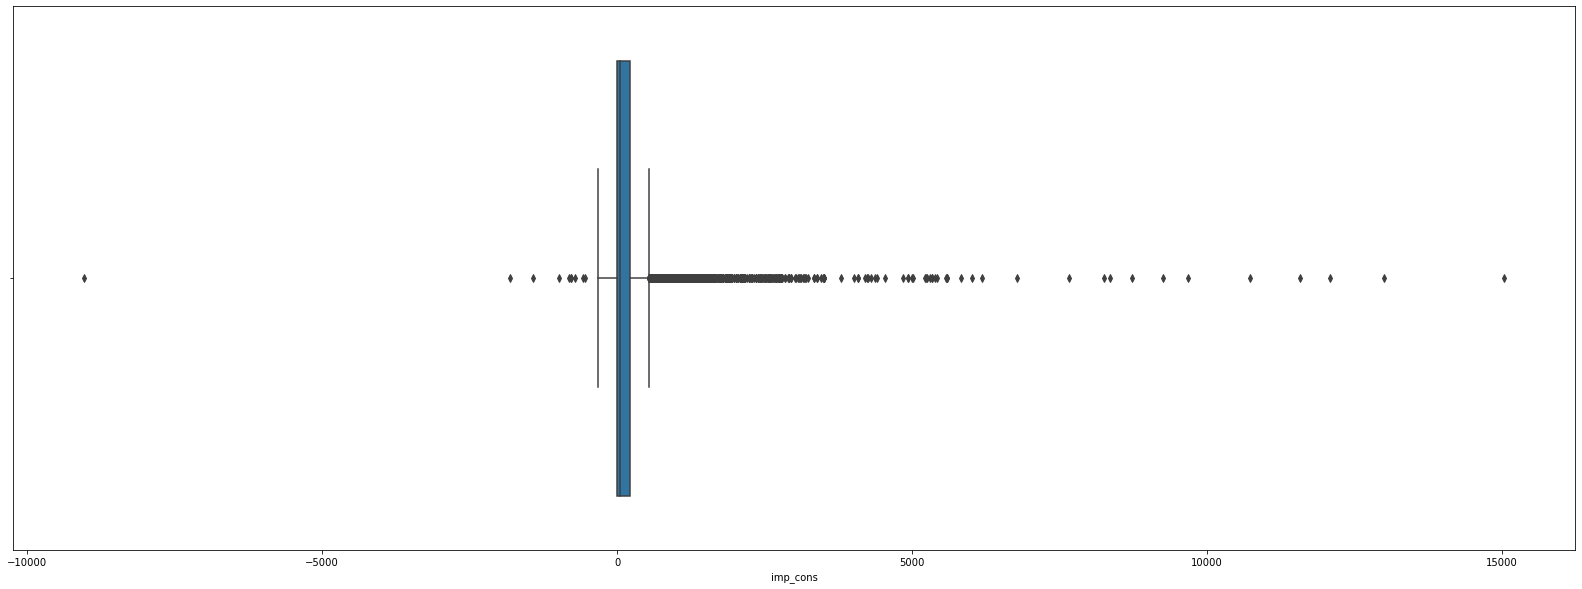

In [385]:
fig, axs = plt.subplots(figsize=(28,10))
sns.boxplot(x=merge['imp_cons'])

<AxesSubplot:xlabel='forecast_discount_energy'>

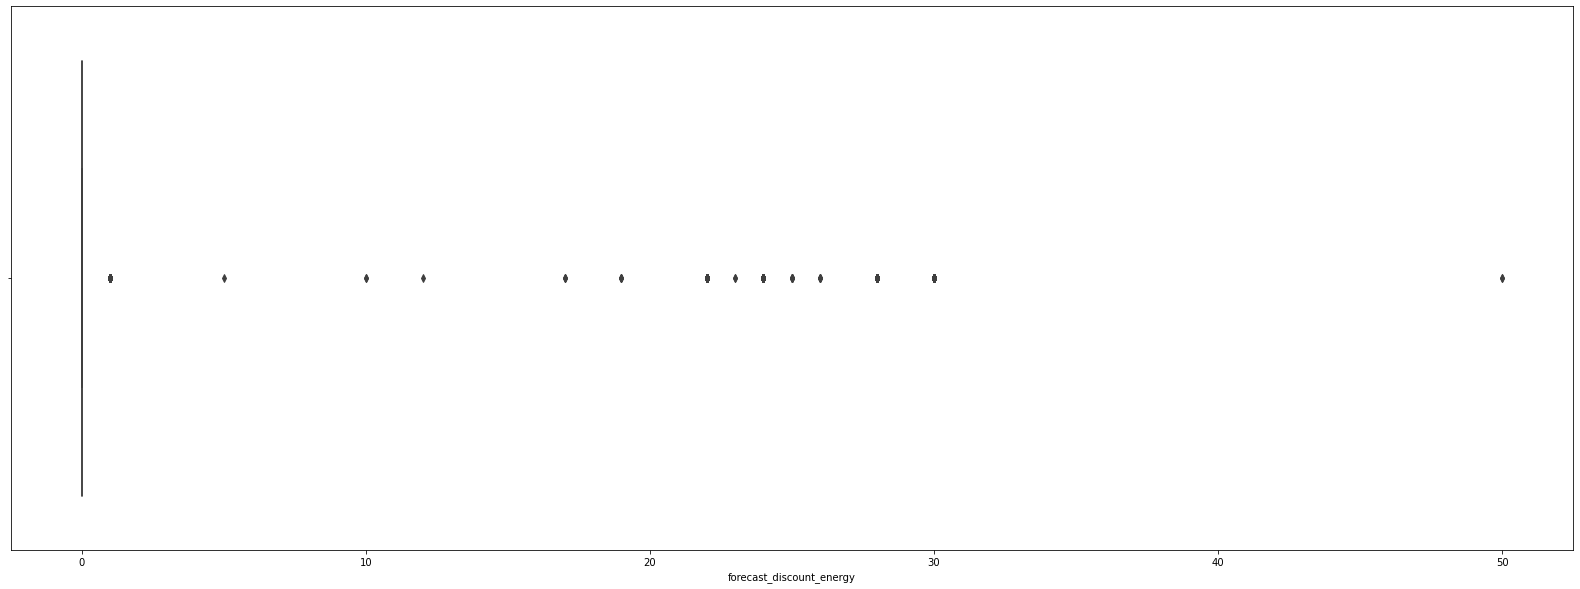

In [386]:
fig, axs = plt.subplots(figsize=(28,10))
sns.boxplot(x=merge['forecast_discount_energy'])

<AxesSubplot:xlabel='forecast_meter_rent_12m'>

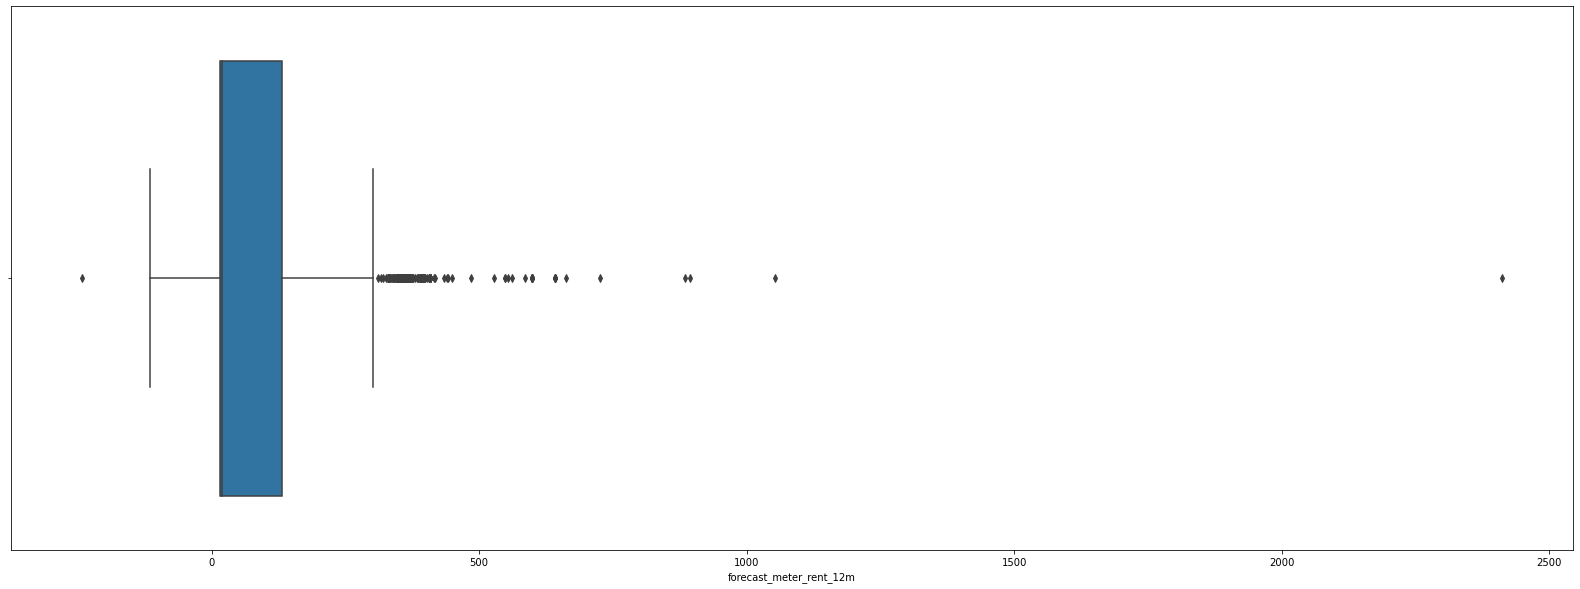

In [387]:
fig, axs = plt.subplots(figsize=(28,10))
sns.boxplot(x=merge['forecast_meter_rent_12m'])

<AxesSubplot:xlabel='forecast_price_pow_p1'>

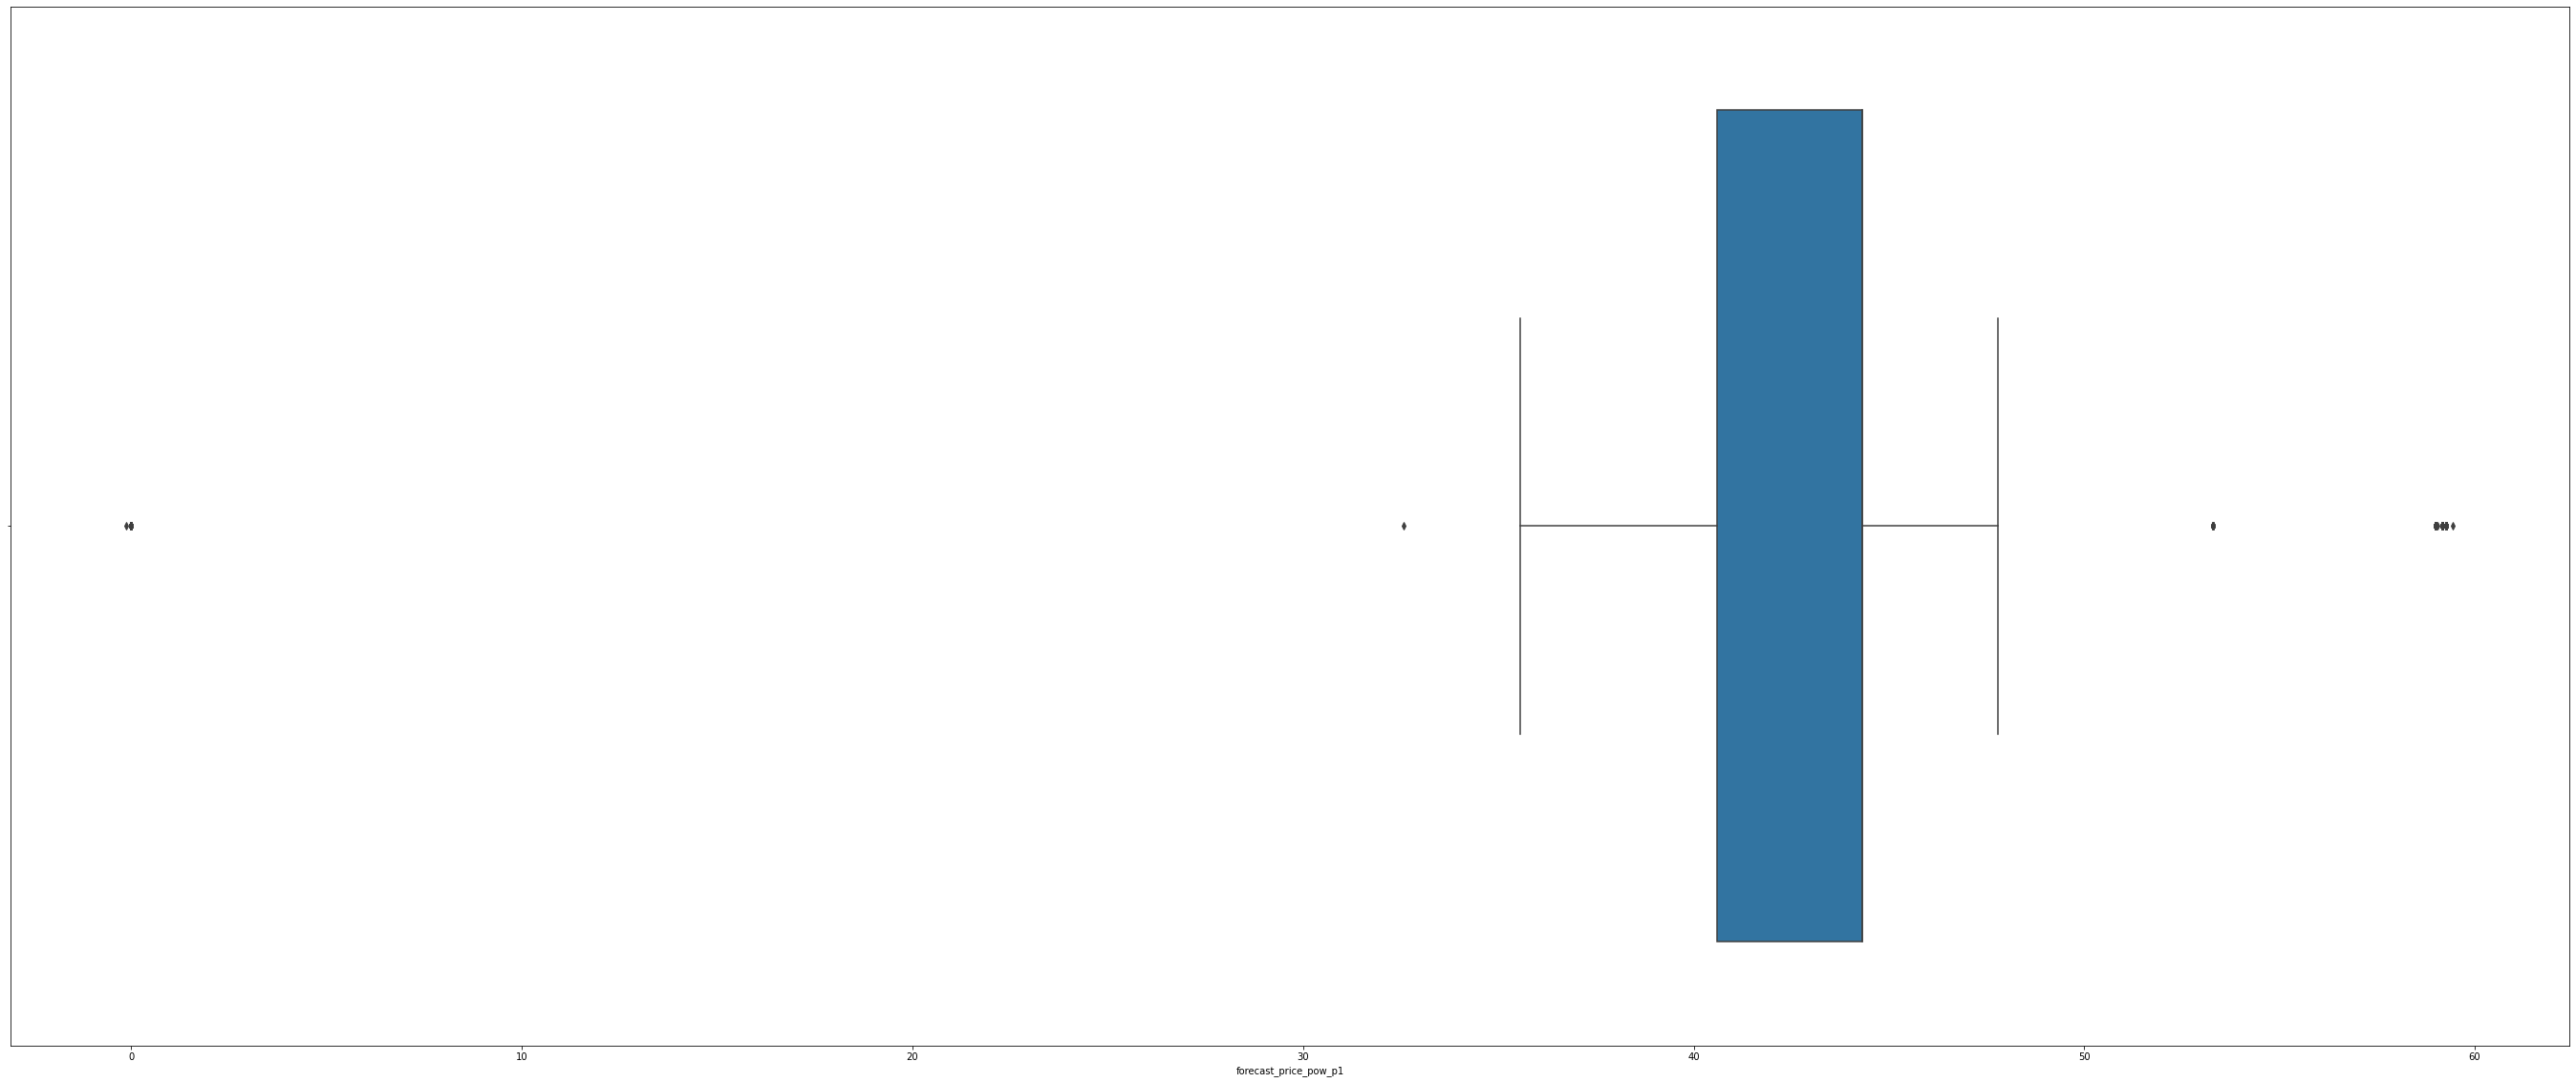

In [388]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['forecast_price_pow_p1'])

<AxesSubplot:xlabel='margin_net_pow_ele'>

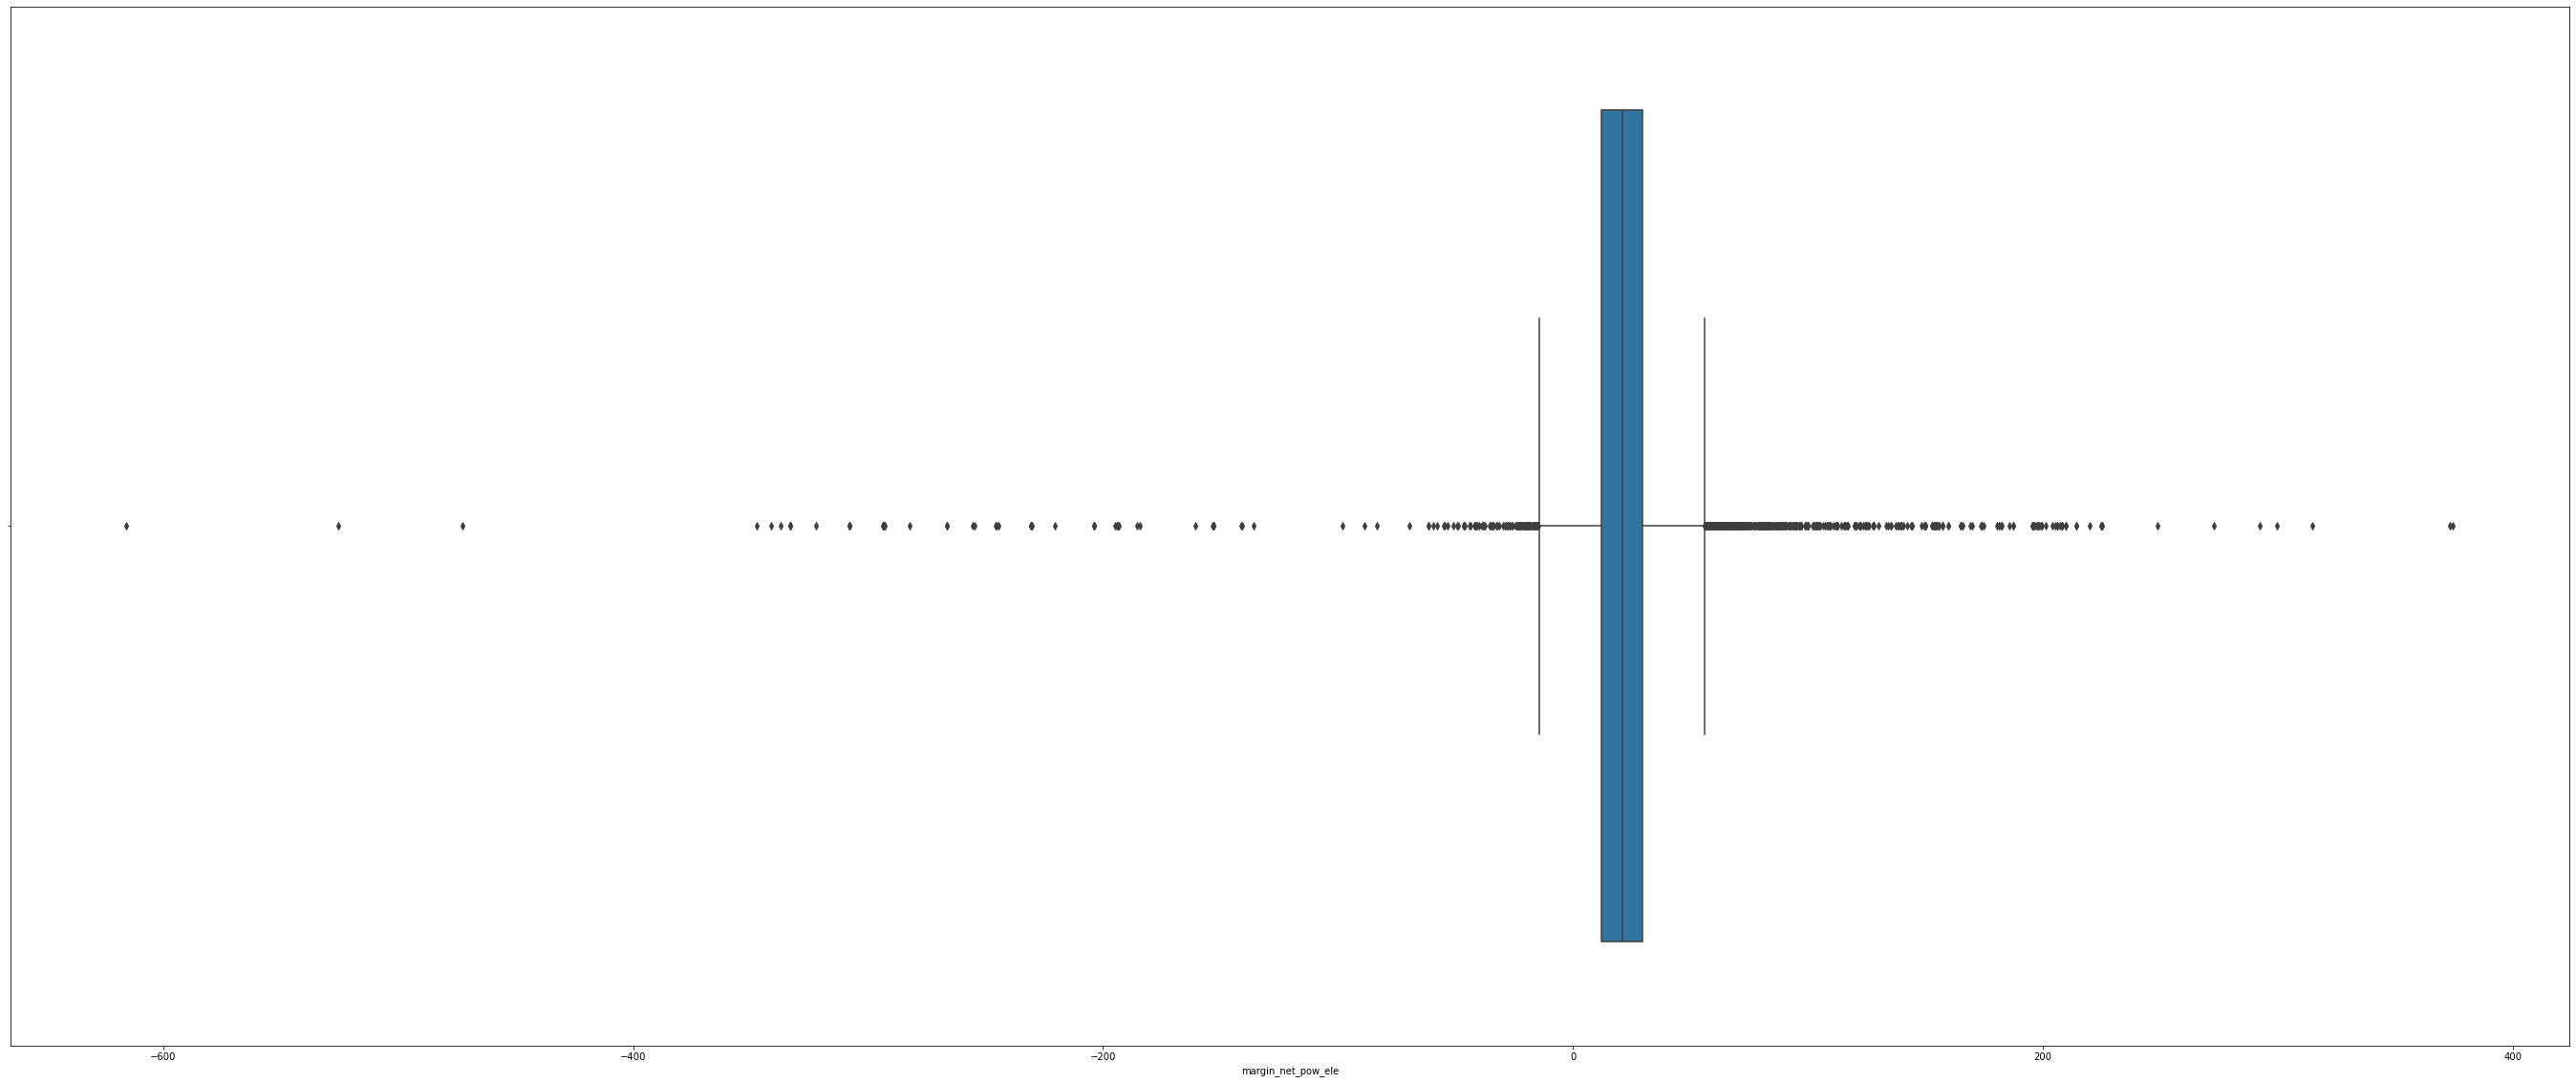

In [389]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['margin_net_pow_ele'])

<AxesSubplot:xlabel='nb_prod_act'>

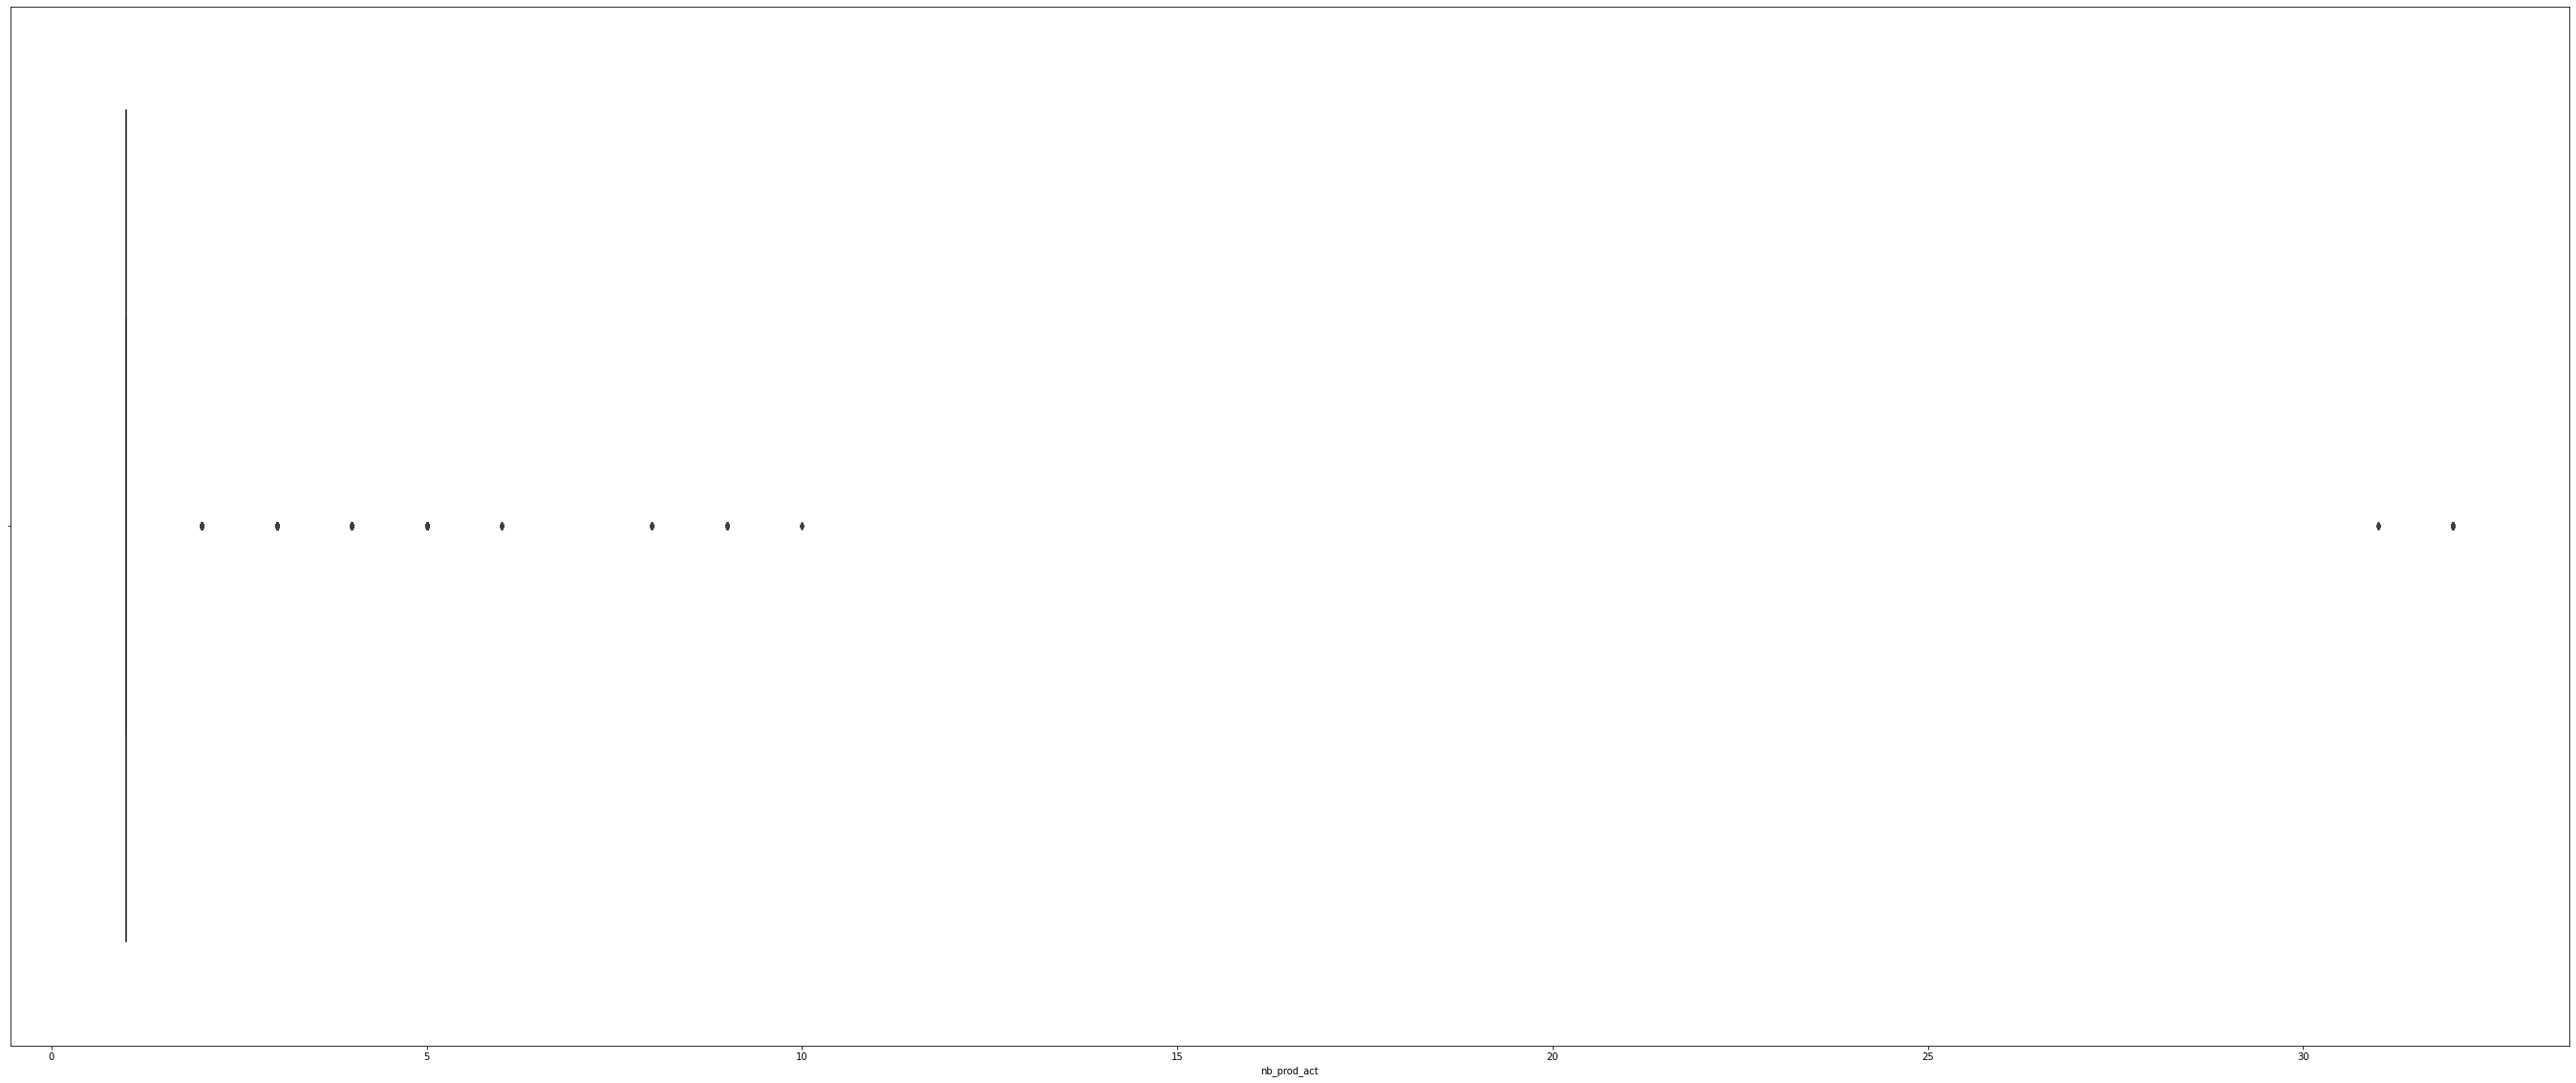

In [390]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['nb_prod_act'])

<AxesSubplot:xlabel='net_margin'>

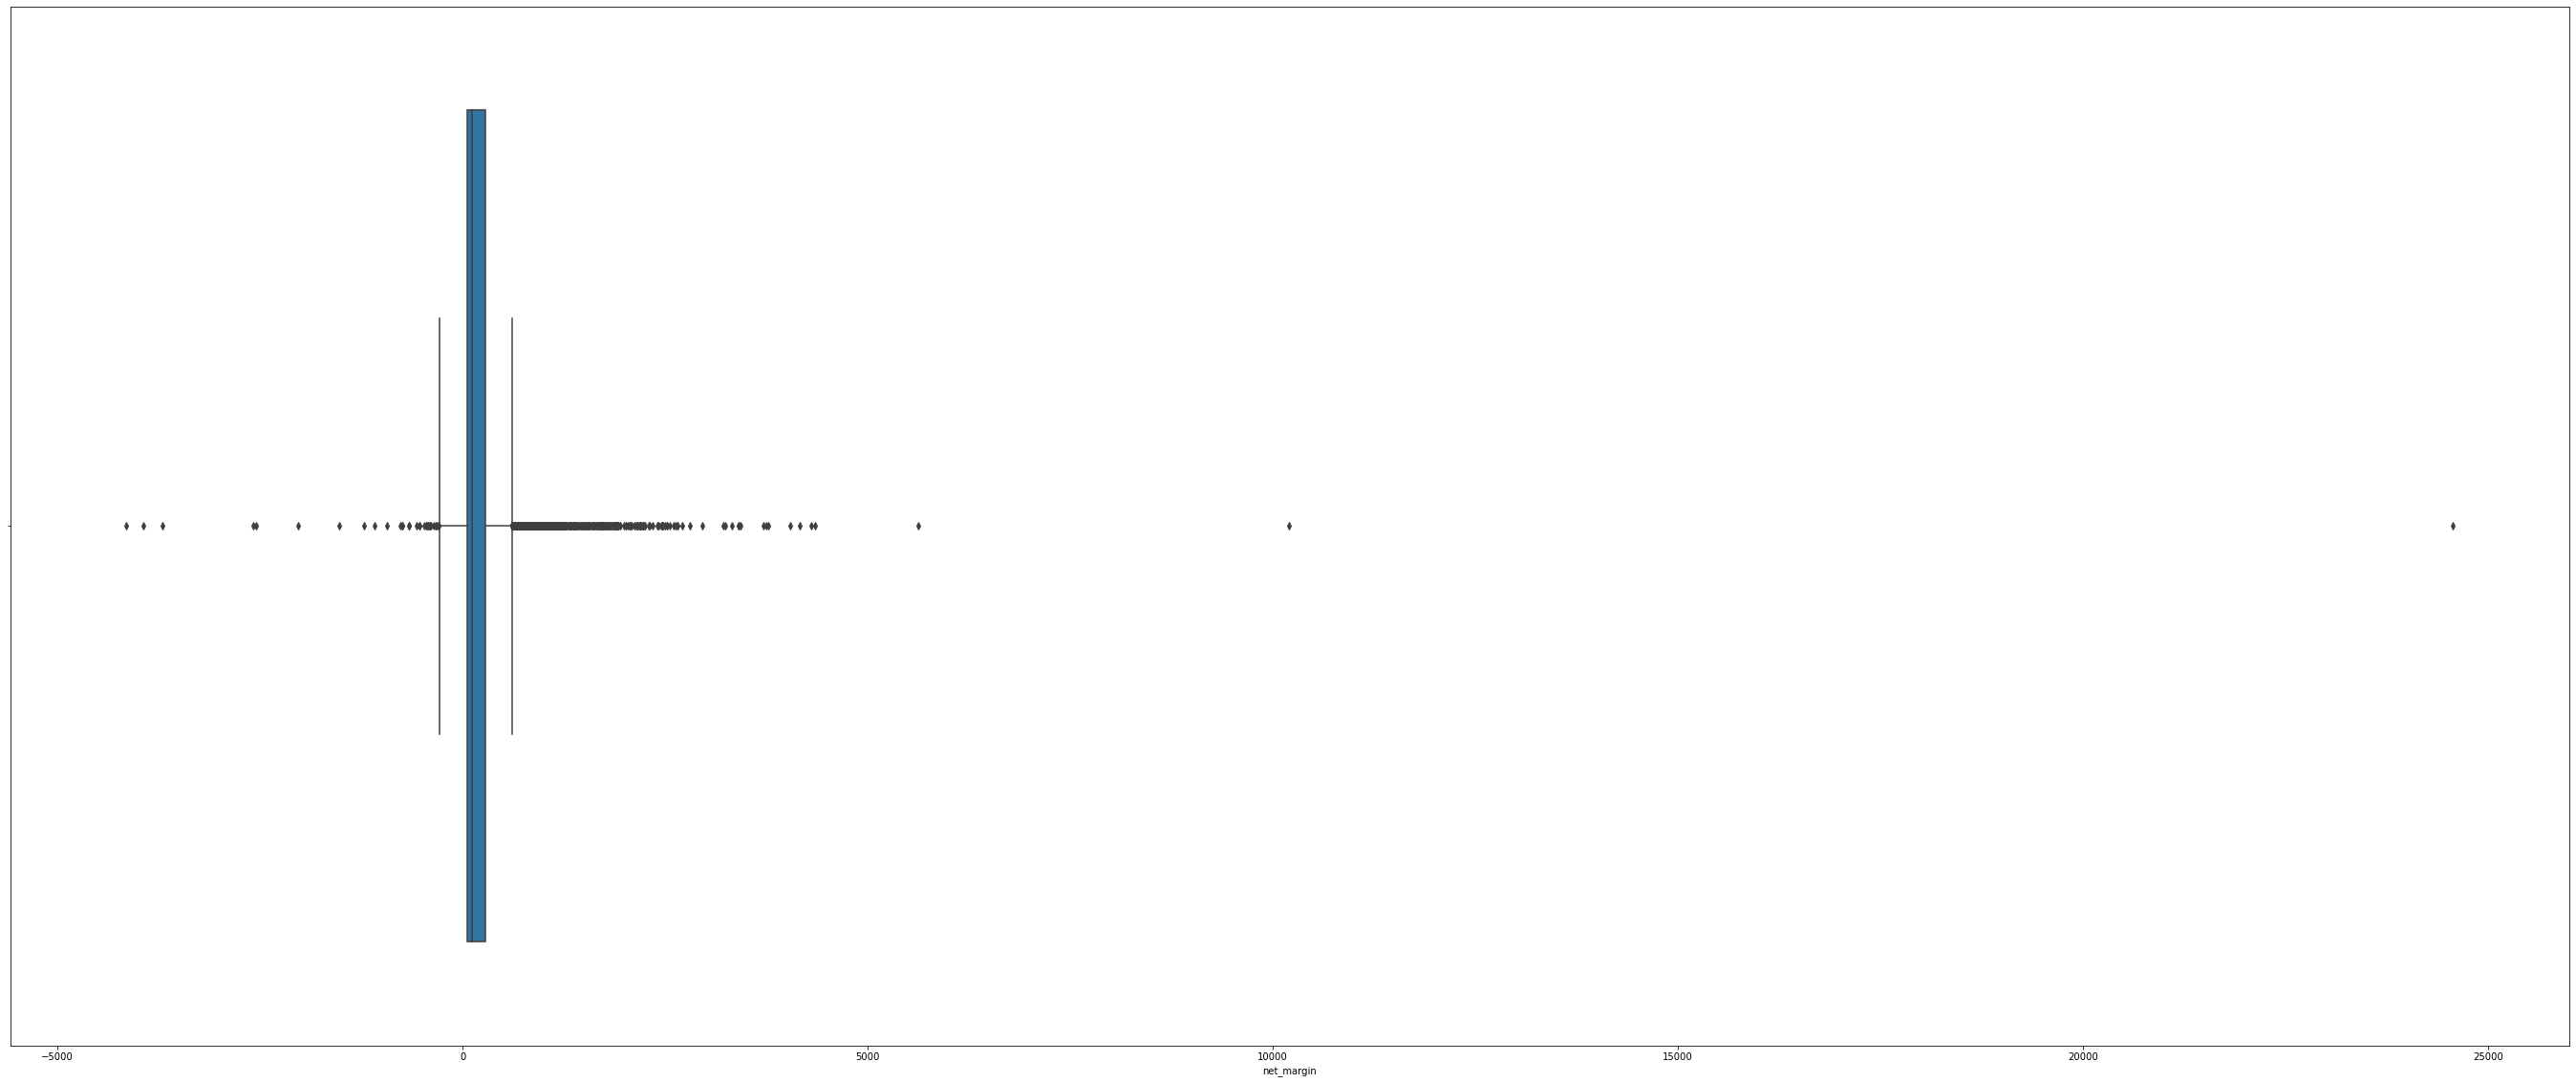

In [391]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['net_margin'])

<AxesSubplot:xlabel='num_years_antig'>

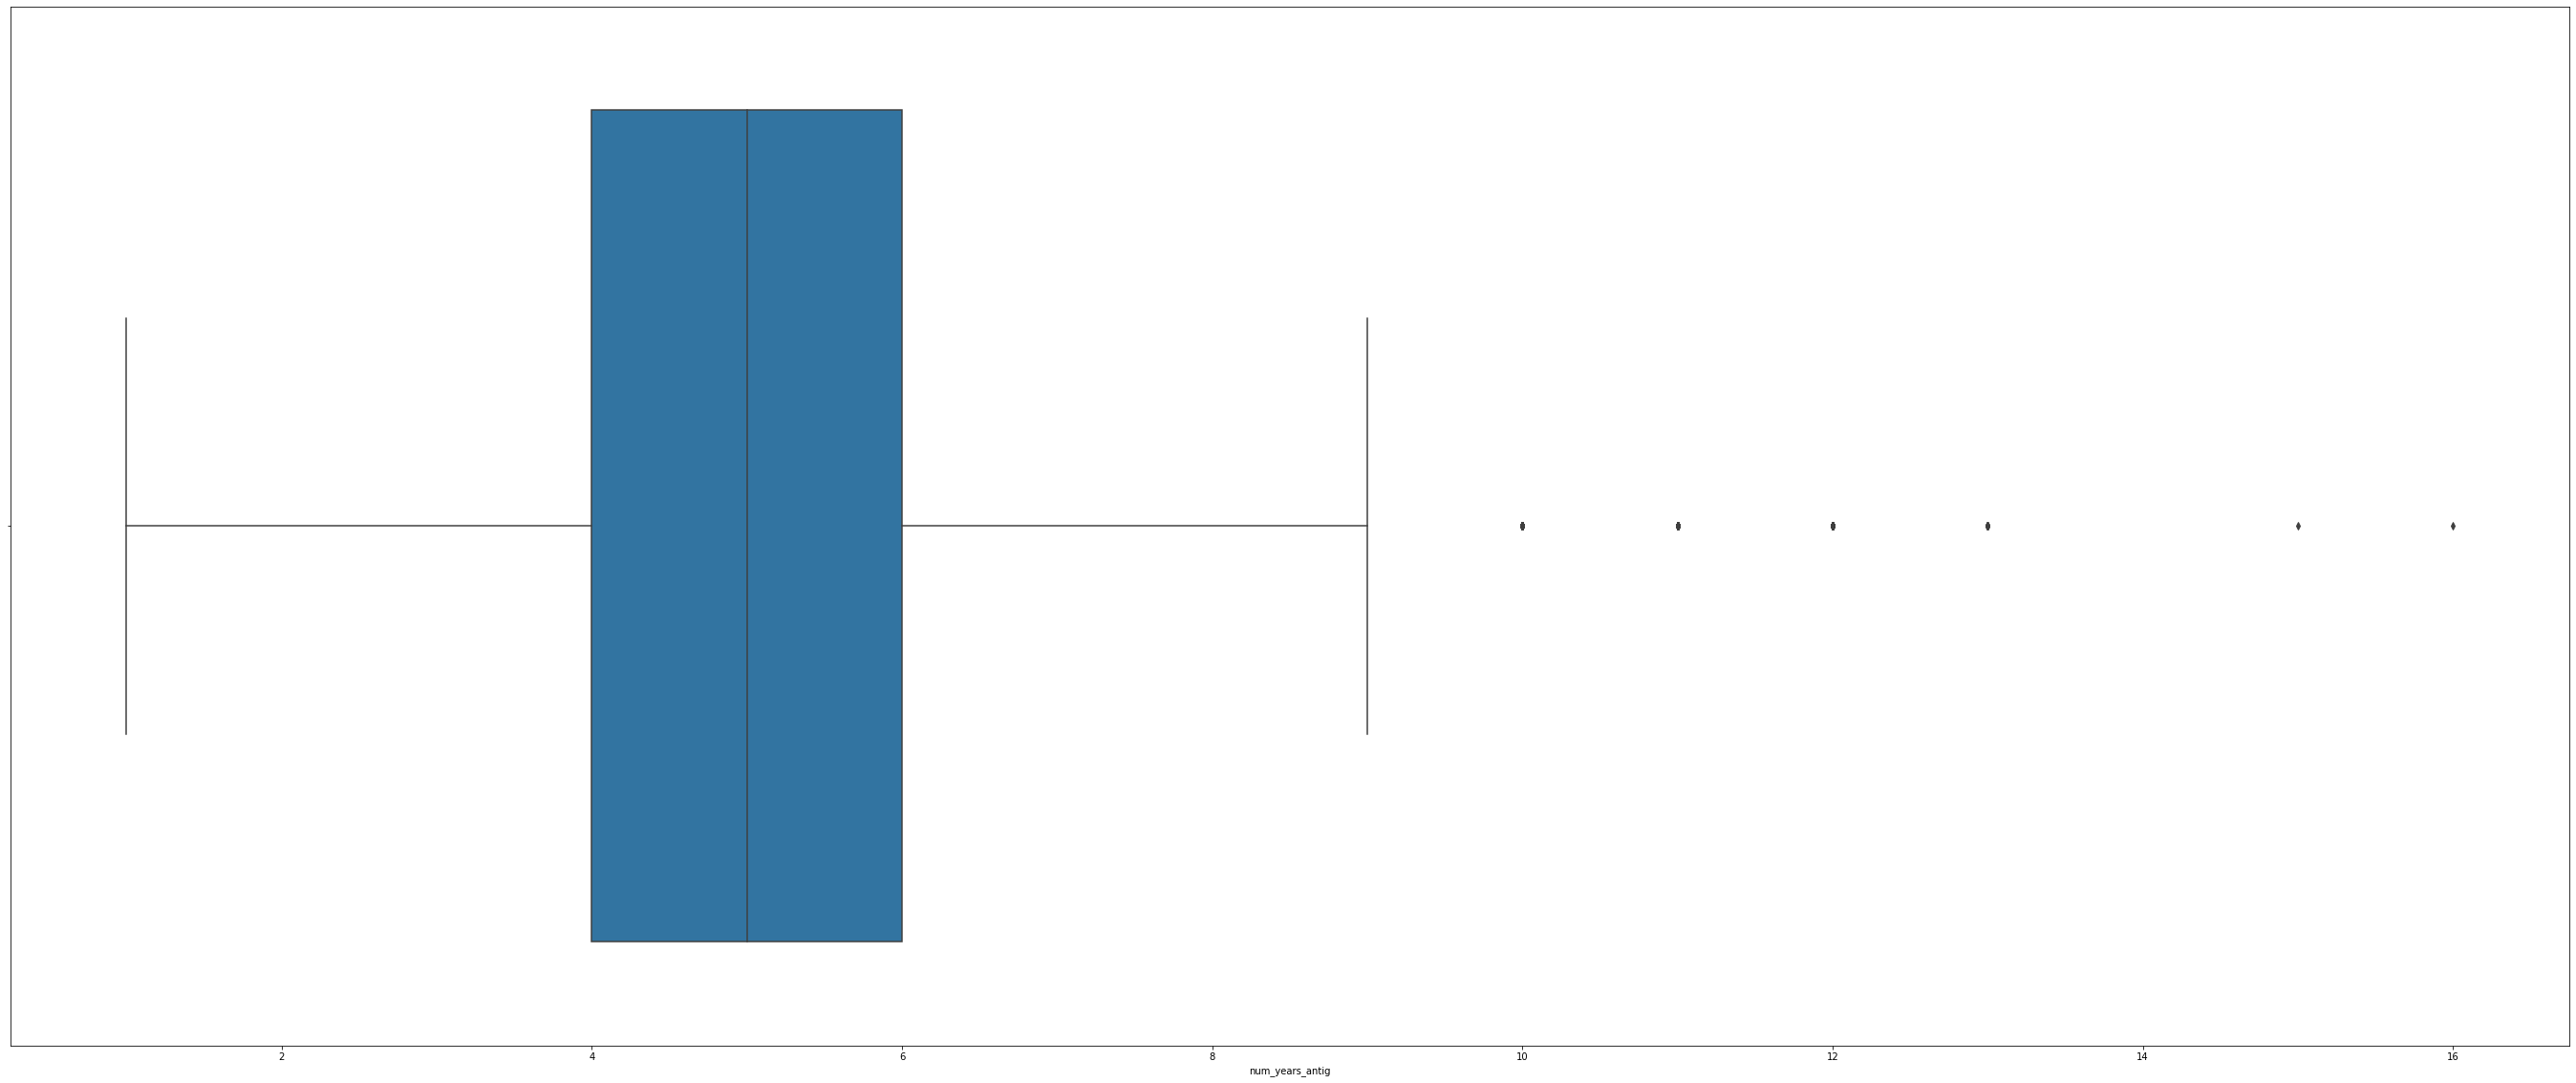

In [392]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['num_years_antig'])

<AxesSubplot:xlabel='pow_max'>

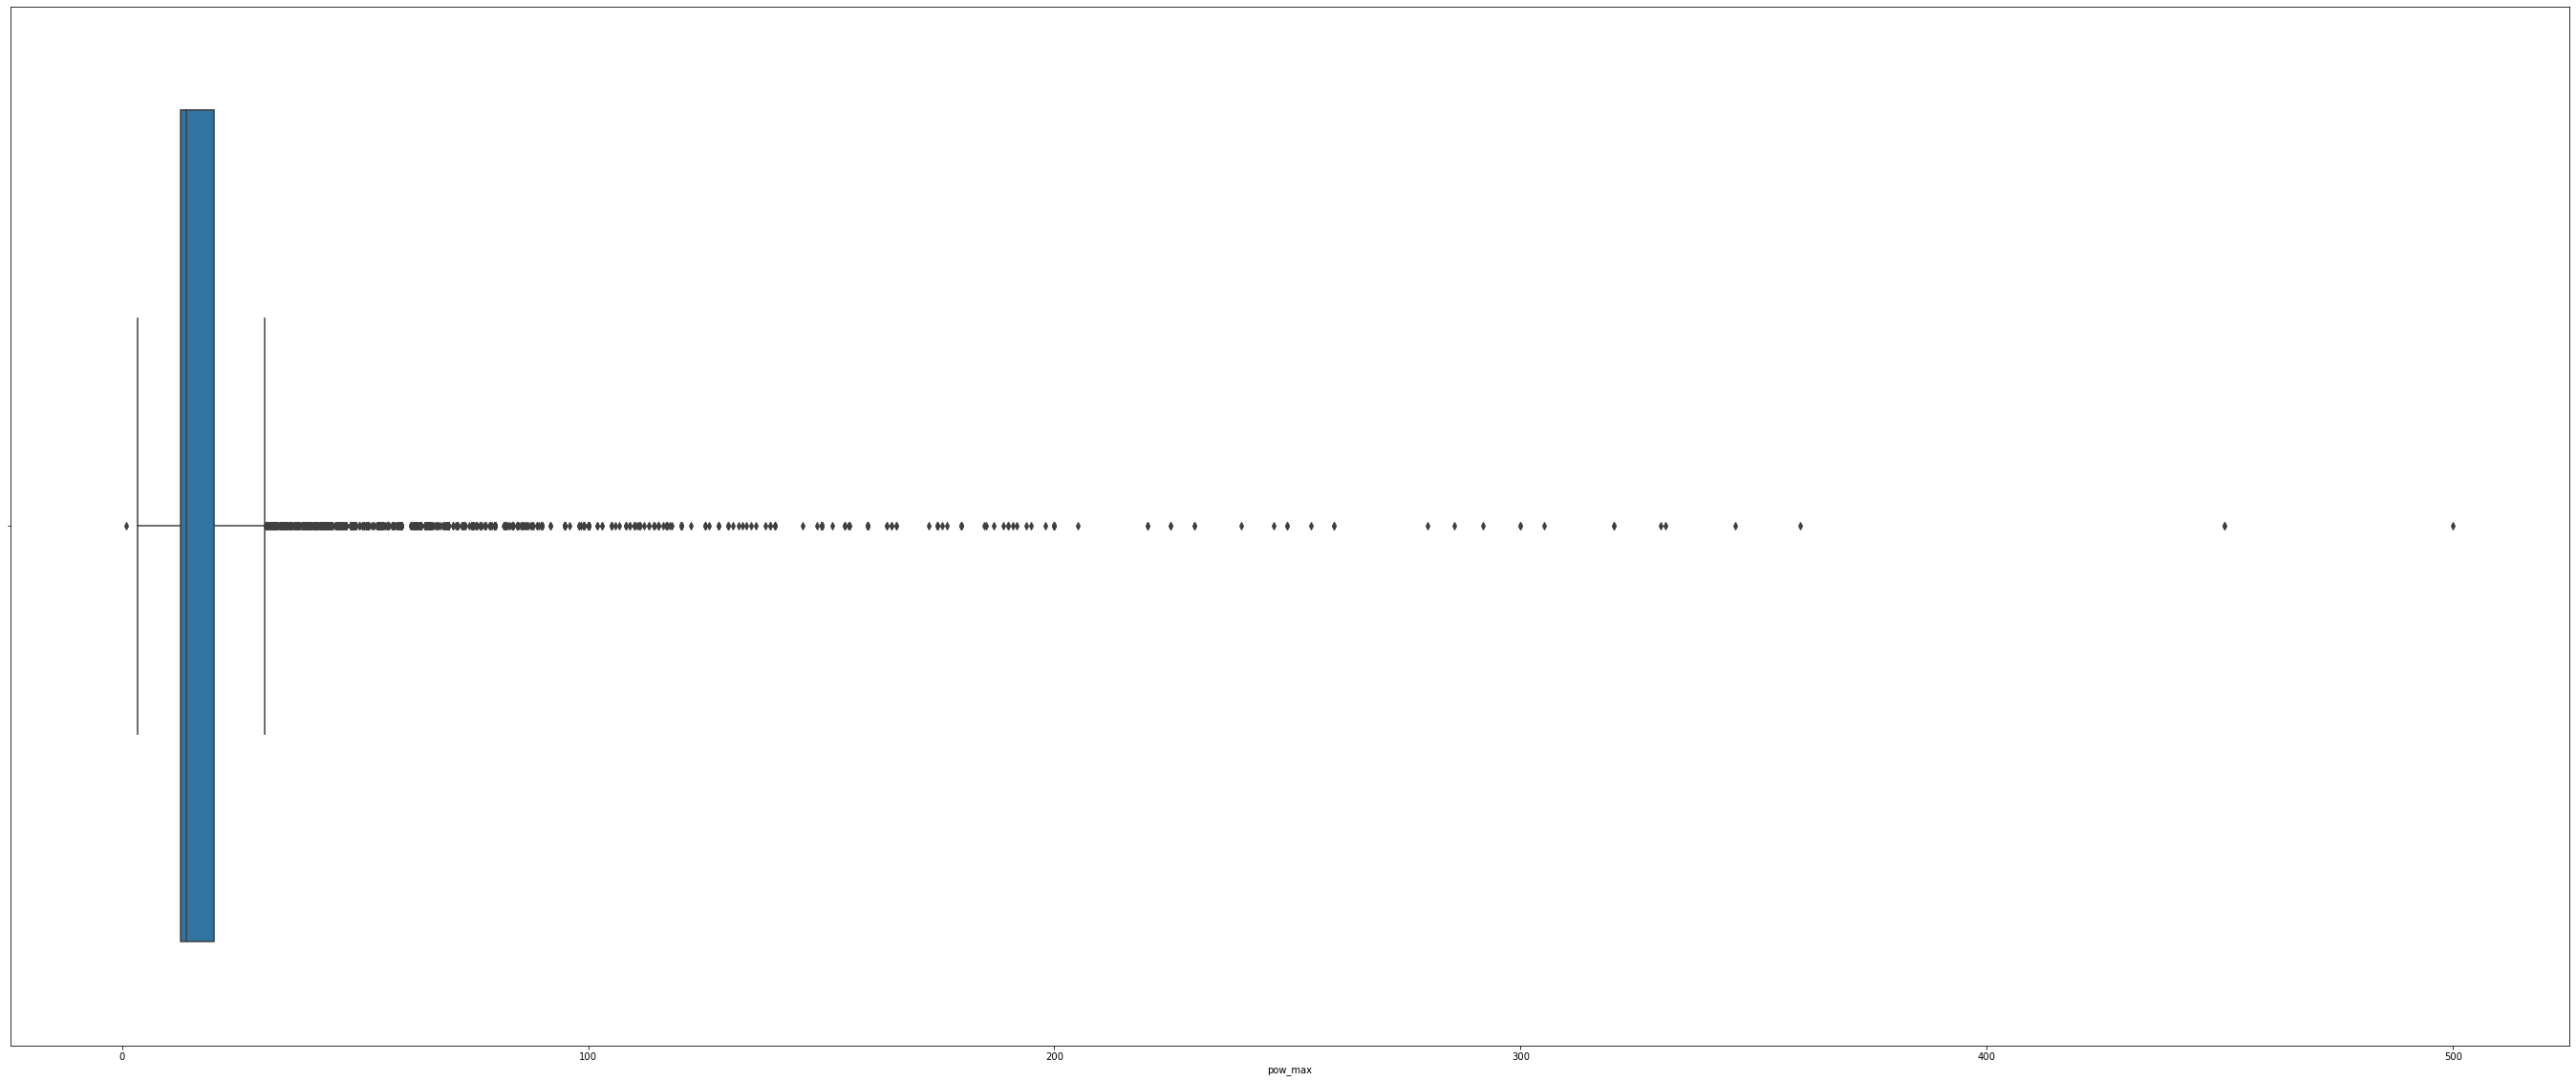

In [393]:
fig, axs = plt.subplots(figsize=(48,20))
sns.boxplot(x=merge['pow_max'])

# Finding factors that affect churning

Now let's find the code of the sales channel that companies suscribed to and check to see if it has correlation with the churning.

In [394]:
channelsales_count=pd.DataFrame(merge['channel_sales'].value_counts())
print(channelsales_count)

                                  channel_sales
foosdfpfkusacimwkcsosbicdxkicaua           7377
lmkebamcaaclubfxadlmueccxoimlema           2073
usilxuppasemubllopkaafesmlibmsdf           1444
ewpakwlliwisiwduibdlfmalxowmwpci            966
sddiedcslfslkckwlfkdpoeeailfpeds             12
epumfxlbckeskwekxbiuasklxalciiuu              4
fixdbufsefwooaasfcxdxadsiekoceaa              2


<AxesSubplot:xlabel='channel_sales'>

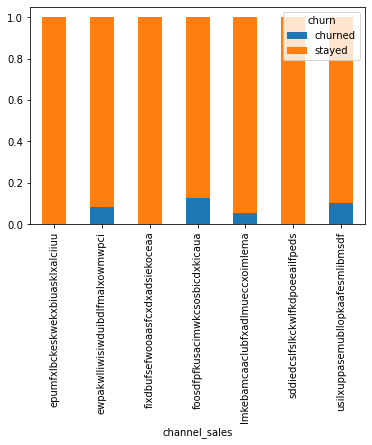

In [395]:
pd.crosstab(merge['channel_sales'],merge['churn'],normalize='index').plot.bar(stacked=True)

Relatively, companies with who joined the firm through 'foosdfpfkusacimwkcsosbicdxkicaua' and 'usilxuppasemubllopkaafesmlibmsdf' sales channel are more likely to churn.

Finding out if churning is dependent on whether a company has gas or not

<AxesSubplot:xlabel='has_gas'>

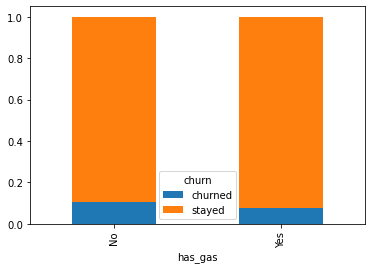

In [396]:
pd.crosstab(merge['has_gas'],merge['churn'],normalize='index').plot.bar(stacked=True)

It can be seen that, relatively, companies without gas churned more than the companies with gas.

Finding out if churning is dependent on whether a company suscribed power or not

In [397]:
merge.groupby(['pow_max','churn']).size().unstack().head()

churn,churned,stayed
pow_max,,
1.000,NaN,1.0
3.300,2.0,5.0
3.450,2.0,2.0
3.464,NaN,4.0
3.500,1.0,1.0


In [398]:
pow_id = merge[['id','churn','pow_max']]
pow_id.head()

,id,churn,pow_max
0,48ada52261e7cf58715202705a0451c9,stayed,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,churned,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,stayed,13.800
3,764c75f661154dac3a6c254cd082ea7d,stayed,13.856
4,bba03439a292a1e166f80264c16191cb,stayed,13.200


we need to group the pow_max into grades

In [399]:
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,200]

In [400]:
pow_id['pow_grade'] = pd.cut(pow_id['pow_max'],bins, labels=None)
pow_id.head()

,id,churn,pow_max,pow_grade
0,48ada52261e7cf58715202705a0451c9,stayed,180.000,"(140, 200]"
1,24011ae4ebbe3035111d65fa7c15bc57,churned,43.648,"(40, 50]"
2,d29c2c54acc38ff3c0614d0a653813dd,stayed,13.800,"(10, 20]"
3,764c75f661154dac3a6c254cd082ea7d,stayed,13.856,"(10, 20]"
4,bba03439a292a1e166f80264c16191cb,stayed,13.200,"(10, 20]"


<AxesSubplot:xlabel='pow_grade'>

<Figure size 2880x1440 with 0 Axes>

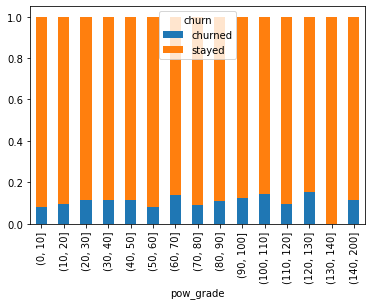

In [401]:
plt.figure(figsize = (40, 20))
pd.crosstab(pow_id['pow_grade'],pow_id['churn'],normalize='index').plot.bar(stacked=True)

Relatively, companies with (60,70), (100,110) and (120,130) suscribed power are more likely to churn.

In [402]:
merge['date_activ'] = pd.to_datetime(merge['date_activ']).dt.to_period('m')
merge['date_end'] = pd.to_datetime(merge['date_end']).dt.to_period('m')
merge['date_modif_prod'] = pd.to_datetime(merge['date_modif_prod']).dt.to_period('m')
merge['date_renewal'] = pd.to_datetime(merge['date_renewal']).dt.to_period('m')

In [403]:
merge.head()

,id,churn,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,stayed,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11,2016-11,2012-11,...,58.995952,No,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,churned,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06,2016-06,NaT,...,40.606701,Yes,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,stayed,NaN,NaN,4660,0,0,2009-08,2016-08,2009-08,...,44.311378,No,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,stayed,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04,2016-04,2010-04,...,44.311378,No,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,stayed,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03,2016-03,2010-03,...,44.311378,No,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


<AxesSubplot:xlabel='date_activ'>

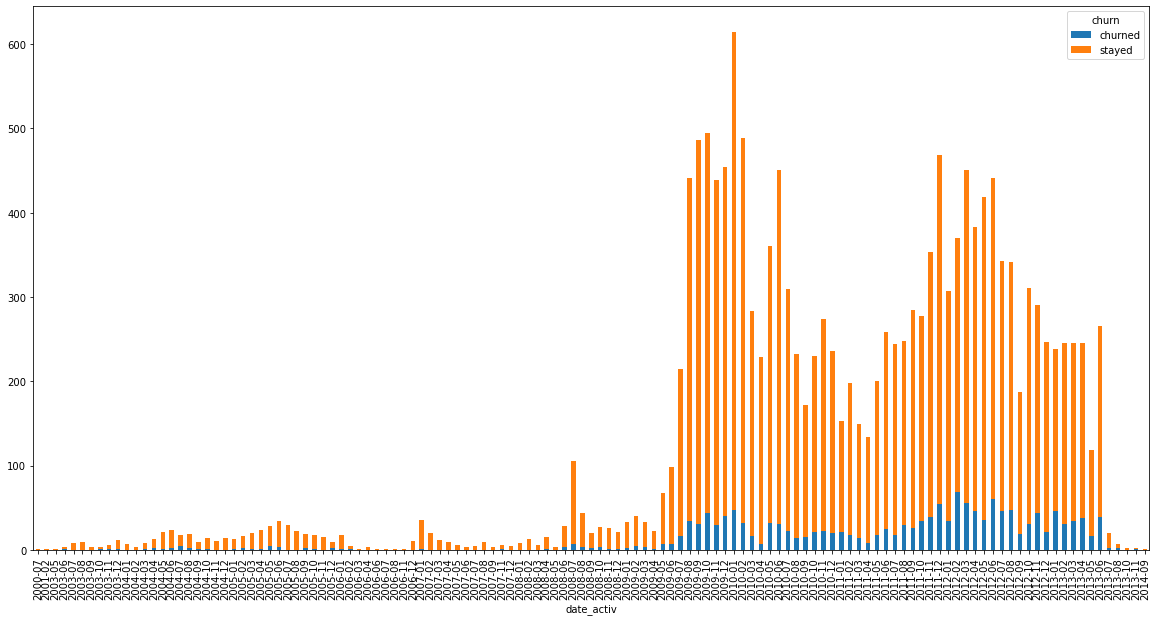

In [404]:
plt.rcParams['figure.figsize']=(20,10)
merge.groupby(['date_activ','churn']).size().unstack().plot.bar(stacked=True)

Relatively, companies with who joined the firm through from december 2011 to 2014 are more likely to churn.

<AxesSubplot:xlabel='date_end'>

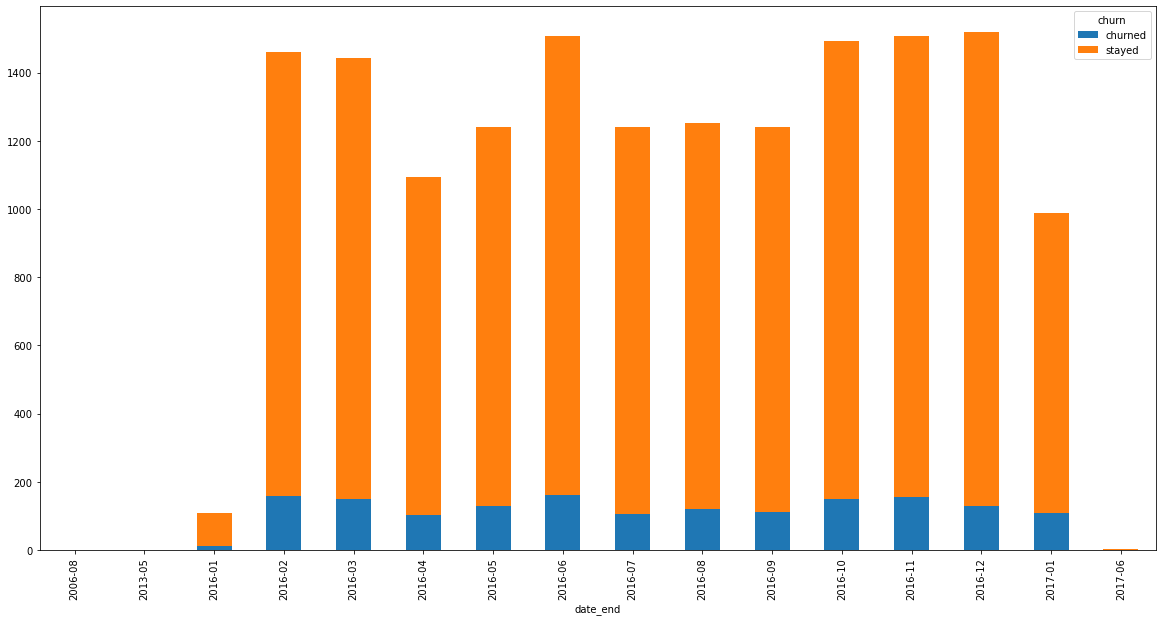

In [405]:
plt.rcParams['figure.figsize']=(20,10)
merge.groupby(['date_end','churn']).size().unstack().plot.bar(stacked=True)

Active products and services

<AxesSubplot:xlabel='nb_prod_act'>

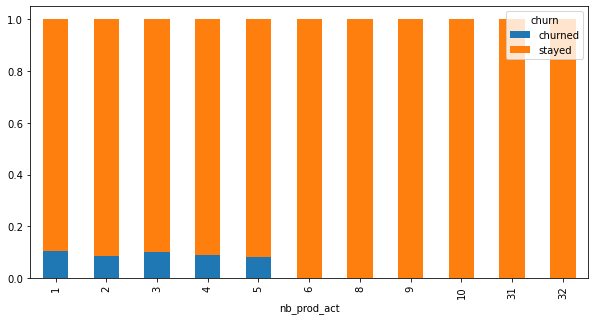

In [406]:
plt.rcParams['figure.figsize']=(10,5)
pd.crosstab(merge['nb_prod_act'],merge['churn'],normalize='index').plot.bar(stacked=True)

Relatively, companies with 1-5 active products and services are more likely to churn.

<AxesSubplot:xlabel='num_years_antig'>

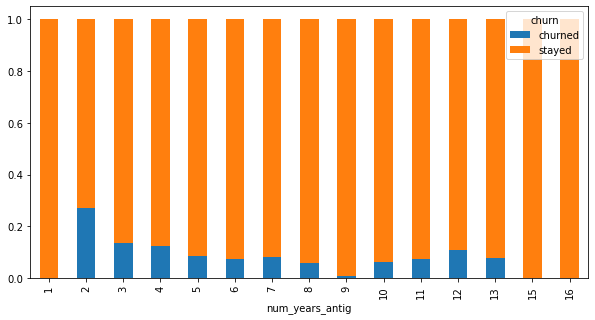

In [407]:
plt.rcParams['figure.figsize']=(10,5)
pd.crosstab(merge['num_years_antig'],merge['churn'],normalize='index').plot.bar(stacked=True)

Relatively, companies are likely to churn in the second year. After, the probability for companies to churn diminishes up to the ninth year and starts rising again. By the 15th year, the companies are more likely to stay.

Code of the electricity campaign the customer first subscribed to

<AxesSubplot:xlabel='origin_up'>

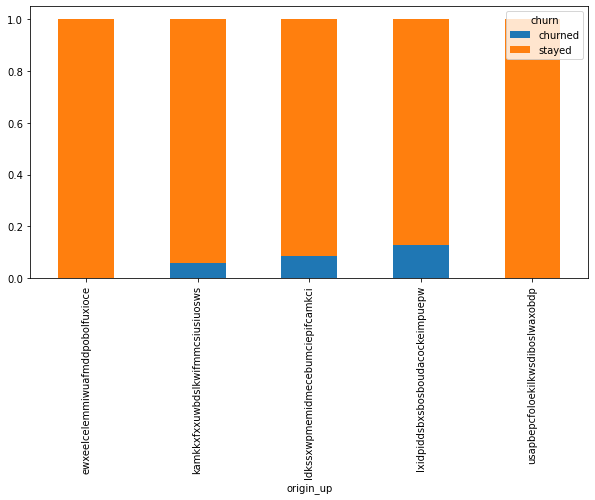

In [408]:
plt.rcParams['figure.figsize']=(10,5)
pd.crosstab(merge['origin_up'],merge['churn'],normalize='index').plot.bar(stacked=True)

Relatively, companies that first suscribed to the code of the electricity campaign 'lxidpiddsbx' is likely to churn.  

# Histogram of the data

<AxesSubplot:ylabel='Frequency'>

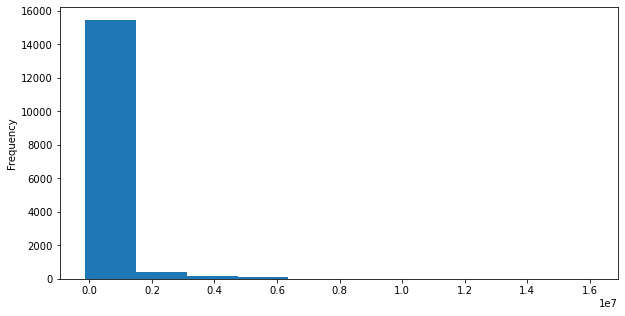

In [409]:
merge["cons_12m"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

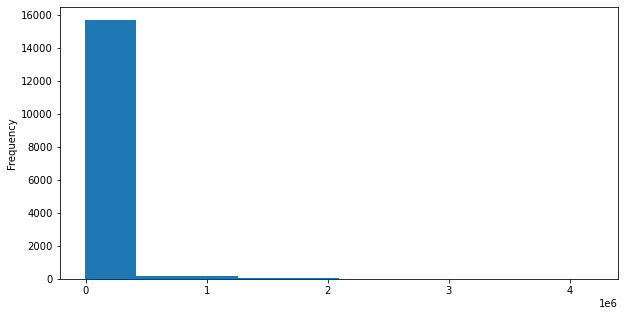

In [410]:
merge["cons_gas_12m"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

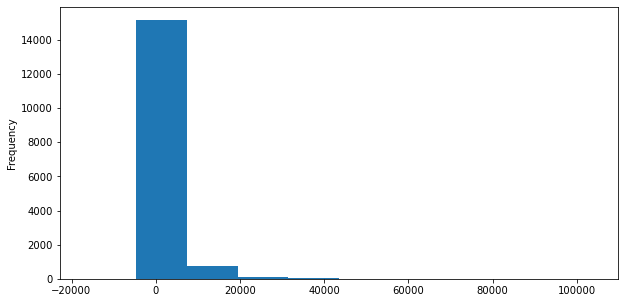

In [411]:
merge["forecast_cons_12m"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

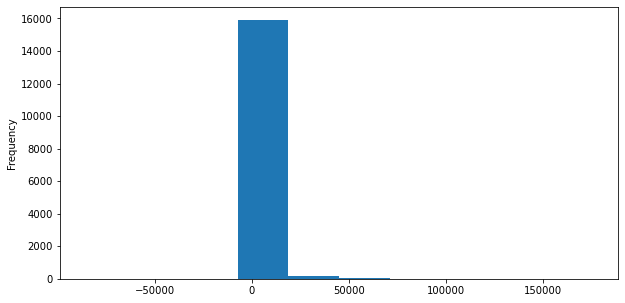

In [412]:
merge["forecast_cons_year"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

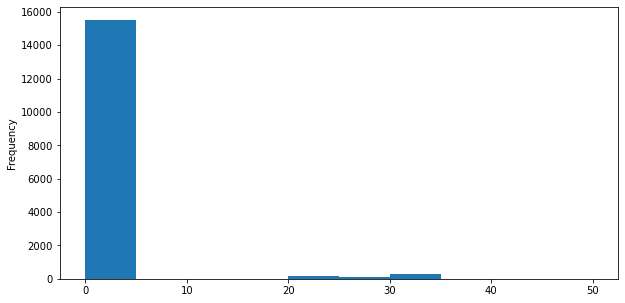

In [413]:
merge["forecast_discount_energy"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

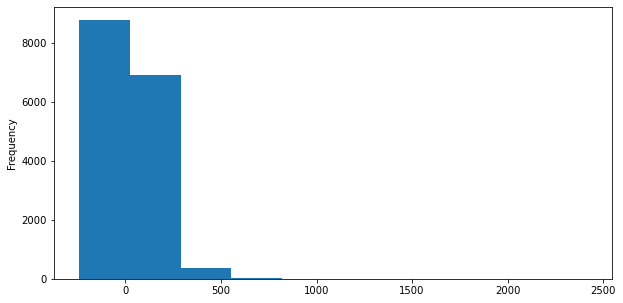

In [414]:
merge["forecast_meter_rent_12m"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

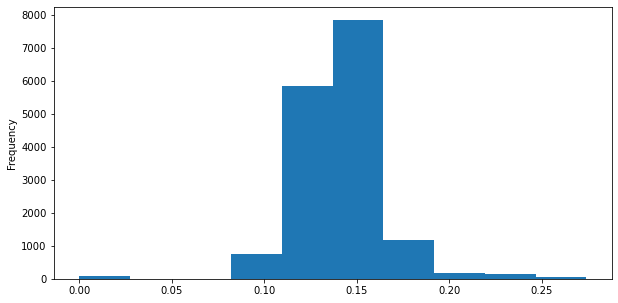

In [415]:
merge["forecast_price_energy_p1"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

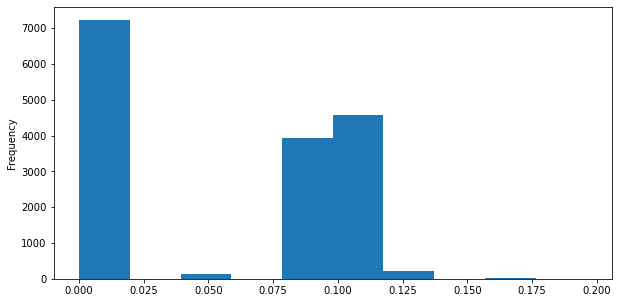

In [416]:
merge["forecast_price_energy_p2"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

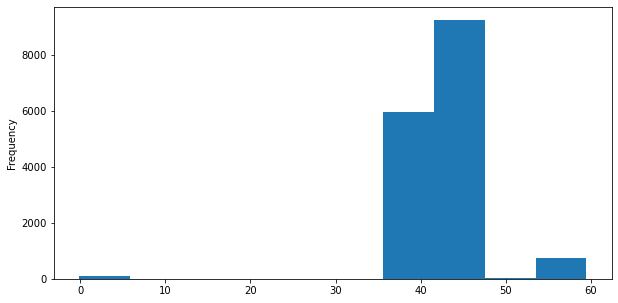

In [417]:
merge["forecast_price_pow_p1"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

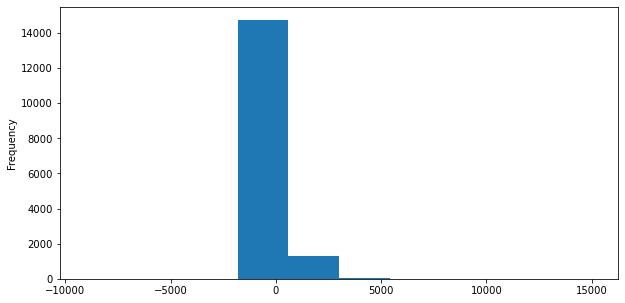

In [418]:
merge["imp_cons"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

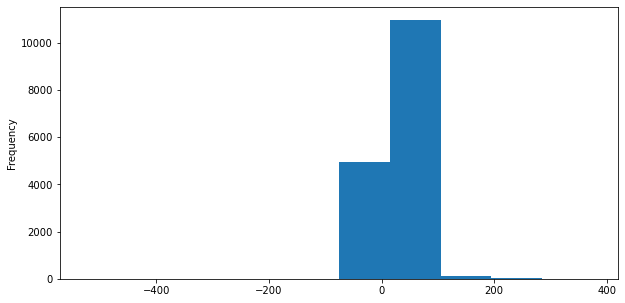

In [419]:
merge["margin_gross_pow_ele"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

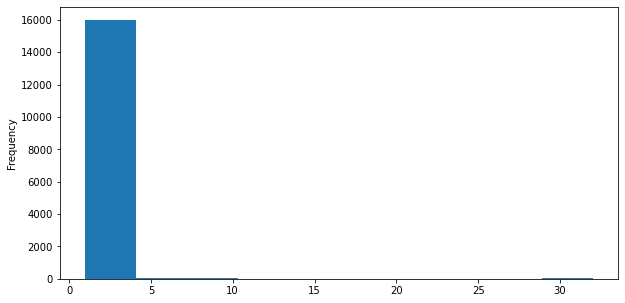

In [420]:
merge["nb_prod_act"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

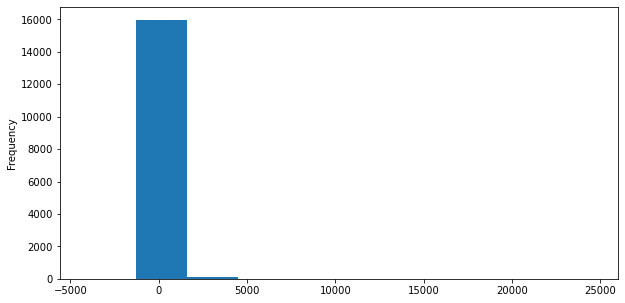

In [421]:
merge["net_margin"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

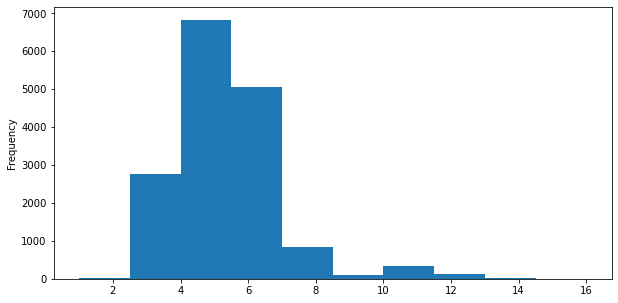

In [422]:
merge["num_years_antig"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

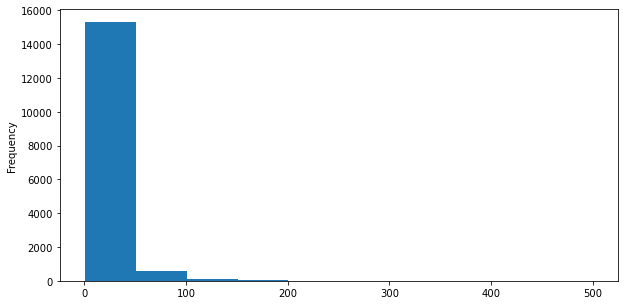

In [423]:
merge["pow_max"].plot.hist()

It can be seen that most of the data are rightly skewed

## Checking the company with the highest consumption

In [424]:
consumption = merge[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]

In [425]:
total_cons_12m = pd.DataFrame(consumption.groupby(["id", "churn"])["cons_12m"].agg(["sum"]))
total_cons_12m.sort_values(ascending=False, by="sum").head()

,,sum
id,churn,
2c2abbe8998364dd500e41588d41f45f,stayed,16097108
b880901f75613c801886354abf24f30a,stayed,6286272
3cbf266f90f0419636aa9e748fa0e7f0,stayed,6286272
f3baf732b3a86a45f5aec2d4578070c0,stayed,6286272
4130bb214991c2ec4504b96d527624ca,stayed,6286272


It can be seen that ,company '2c2abbe8998364dd500e41588d41f45f' has the highest consumption of energy.

In [426]:
merge.to_csv('merge.csv')